# P1 : IRIS –HIERARCHICALFISHER

In [2]:
#Importing all the necessary packages with repestive to the program
import pandas as panda
from matplotlib import pyplot
import numpy as numpy
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as formula
import seaborn as seasns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Creating the two data frame which is of two dataset (Training & Test) respectively
irisTrainDataSet = panda.read_csv("D:/IRIS/train.csv", index_col=0)
irisTestDataSet = panda.read_csv("D:/IRIS/test.csv", index_col=0)

In [3]:
#Seeing the few few records and also, how the data looks like in the dataframe
irisTrainDataSet.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
#Describing the training dataset for viewing how the mean, sd etc for the attributes
irisTrainDataSet.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,93.000000,93.000000,93.000000,93.000000
mean,5.782796,3.009677,3.749462,1.194624
std,0.792989,0.438392,1.707186,0.726721
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.700000,1.500000,0.400000
50%,5.700000,3.000000,4.300000,1.300000
75%,6.300000,3.200000,5.000000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [5]:
#Specifically viewing the Species type which is setosa from the trainig dataset
irisTrainDataSet[irisTrainDataSet['Species']=="setosa"].describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,29.000000,29.00000,29.000000,29.000000
mean,4.955172,3.40000,1.431034,0.241379
std,0.352122,0.40444,0.173418,0.098261
min,4.300000,2.30000,1.000000,0.100000
25%,4.700000,3.10000,1.300000,0.200000
50%,5.000000,3.40000,1.400000,0.200000
75%,5.200000,3.60000,1.500000,0.300000
max,5.700000,4.40000,1.900000,0.400000


In [6]:
#Same goes with versicolor as well
irisTrainDataSet[irisTrainDataSet['Species']=="versicolor"].describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,36.000000,36.000000,36.000000,36.000000
mean,5.861111,2.752778,4.261111,1.338889
std,0.537336,0.311206,0.489477,0.196073
min,4.900000,2.000000,3.000000,1.000000
25%,5.500000,2.500000,4.000000,1.200000
50%,5.750000,2.800000,4.350000,1.300000
75%,6.225000,3.000000,4.600000,1.500000
max,6.900000,3.300000,5.100000,1.800000


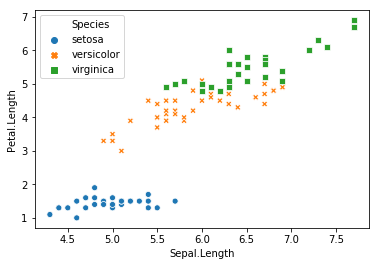

In [7]:
#Plotting the scatter plot for all the class with respective to the SepalLengthCm, PetalLengthCm, and finding which 
#two classess are close to each other
seasns.scatterplot(x="Sepal.Length", y="Petal.Length", hue="Species",style="Species",data=irisTrainDataSet,legend="full")

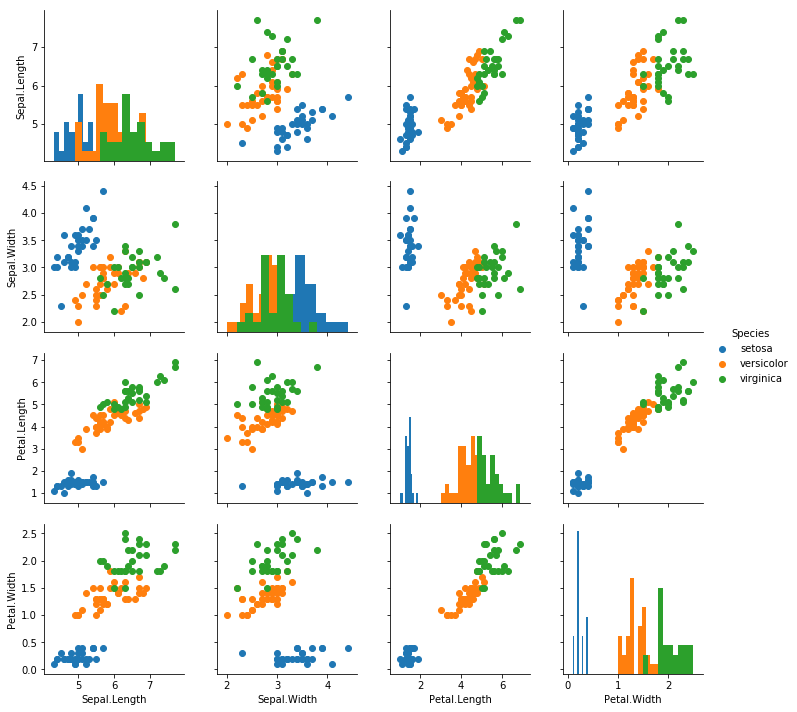

In [8]:
#Visualizing the entire dataset and seeing how the class looks like, and which are close by with the respective of the different
#parameter
irisGraph = seasns.PairGrid(irisTrainDataSet, hue="Species")
irisGraph = irisGraph.map_diag(pyplot.hist)
irisGraph = irisGraph.map_offdiag(pyplot.scatter)
irisGraph = irisGraph.add_legend()

In [35]:
# User defined function, it's purpose to assign the class labels which are close to each other. Here we formig the meta class typ
# of the classes, where we are assigning the class label to the versicolor etc.
def assignMetaClassValue(contentRecord):
    if contentRecord['Species'] == 'versicolor':
        assignValue = 'Class4'
    elif contentRecord['Species'] == 'virginica':
        assignValue = 'Class4'
    else:
        assignValue = 'Class3'
    return assignValue

In [36]:
#Assigning the dataset to a different dataframe, for betterment of the varible control
irisTrainDataSetClass1Class2 = irisTrainDataSet
irisTrainDataSetClass1Class2['MetaIrisClass'] = irisTrainDataSet.apply(assignMetaClassValue, axis=1)

In [37]:
#Applying the LDA model for the projection with discriminating of the class 3 & class 4
FirstFishserProjection = LinearDiscriminantAnalysis(solver='eigen',n_components=2).fit(irisTrainDataSet.iloc[:,:4],irisTrainDataSetMetaClass['MetaIrisClass'])
FirstFishserProjection.coef_

array([[-0.74562999, -1.64578452,  1.80216146,  0.41783696]])

C:\Users\welcome\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


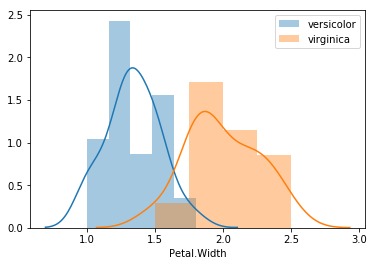

In [38]:
#Plotting the graph on the versicolor and virginica and we can see the with train dataset, they are overlapping on each other
seasns.distplot(irisTrainDataSetClass1Class2.loc[irisTrainDataSetClass1Class2['Species'] == 'versicolor']['Petal.Width'],label='versicolor')
seasns.distplot(irisTrainDataSetClass1Class2.loc[irisTrainDataSetClass1Class2['Species'] == 'virginica']['Petal.Width'],label='virginica')
pyplot.legend()
pyplot.show()

In [39]:
#Fitting the Ficher projection with the versicolor and virginica by discriminating the calss 1 & class2
irisTrainDataSetClass1Class2 = irisTrainDataSet.loc[irisTrainDataSet['Species'].isin(['versicolor','virginica'])]
SecondFisherXParameter = irisTrainDataSetClass1Class2.iloc[:,:4]
SecondFisherYParameter = irisTrainDataSetClass1Class2.iloc[:,4]


In [40]:
#Applying the LDA model for the projection with discriminating of the calss 1 & class2
SecondFisherProjection = LinearDiscriminantAnalysis(solver='eigen',n_components=2).fit(SecondFisherXParameter,SecondFisherYParameter)
SecondFisherProjection.coef_

array([[-0.08942792, -0.29338882,  0.21171083,  0.66884114]])

In [41]:
#Projection fo the test data with the above projections, which will give the insights how the test data looks like on this

In [42]:
irisTestData = StandardScaler().fit_transform(irisTestDataSet.iloc[:,:4])
irsisTestDataY = irisTestDataSet.apply(lambda row : assignMetaClassValue(row),axis=1)

In [43]:
ProjectedFisherFor34 = panda.DataFrame(FirstFishserProjection.transform(irisTestData),columns=['projected'])
ProjectedFisherFor34['Class'] = irsisTestDataY

C:\Users\welcome\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


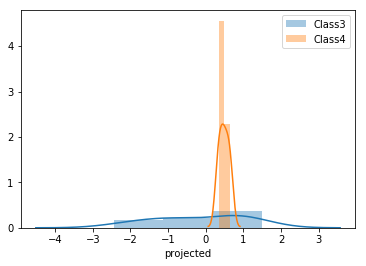

In [44]:
seasns.distplot(ProjectedFisherFor34.loc[ProjectedFisherFor34['Class'] == 'Class3']['projected'],label='Class3')
seasns.distplot(ProjectedFisherFor34.loc[ProjectedFisherFor34['Class'] == 'Class4']['projected'],label='Class4')
pyplot.legend()
pyplot.show()
# Based on the dataset, we can see the after projecting the above clas 3 & 4 discriminating the class 1 & 2
# the now in the train data, the Class 3 looks much spreaded and class 4 is very steep

In [45]:
mean1 = numpy.mean(ProjectedFisherFor34.loc[ProjectedFisherFor34['Class'] == 'Class3'])
mean2 = numpy.mean(ProjectedFisherFor34.loc[ProjectedFisherFor34['Class'] == 'Class4'])

standarDeviation1 = numpy.std(ProjectedFisherFor34.loc[ProjectedFisherFor34['Class'] == 'Class3'])
standarDeviation2 = numpy.std(ProjectedFisherFor34.loc[ProjectedFisherFor34['Class'] == 'Class4'])

ficherDiscrimimnant = (mean1 - mean2)**2 / (standarDeviation1**2 + standarDeviation2**2)
numpy.round(ficherDiscrimimnant,4)

projected    0.3108
dtype: float64

In [46]:
irisTestDataSetWith1And2 = irisTestDataSet.loc[irisTestDataSet['Species'].isin(['versicolor','virginica'])]
testDataWith1And2 = irisTestDataSetWith1And2.iloc[:,:4]
testDataWith1And2 = StandardScaler().fit_transform(testDataWith1And2)
projectFirsher1And2 = panda.DataFrame(SecondFisherProjection.transform(testDataWith1And2),columns=['projected'])
projectFirsher1And2['Class'] = irisTestDataSetWith1And2.iloc[:,4].values

C:\Users\welcome\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


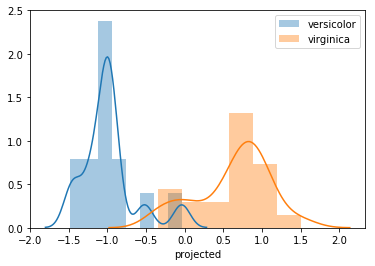

In [47]:
# Based on the dataset, we can see the after projecting the above clas 3 & 4 discriminating the class 1 & 2
# the now in the test data, the versicolor  and virginica are overlapping in each other and they both reside near to the 
# mean value within the sd of 2
seasns.distplot(projectFirsher1And2.loc[projectFirsher1And2['Class'] == 'versicolor']['projected'],label='versicolor')
seasns.distplot(projectFirsher1And2.loc[projectFirsher1And2['Class'] == 'virginica']['projected'],label='virginica')
pyplot.legend()
pyplot.show()

In [48]:
meanOf1 = numpy.mean(projectFirsher1And2.loc[projectFirsher1And2['Class'] == 'versicolor'])
meanOf2 = numpy.mean(projectFirsher1And2.loc[projectFirsher1And2['Class'] == 'virginica'])

standardDeviation1 = numpy.std(projectFirsher1And2.loc[projectFirsher1And2['Class'] == 'versicolor'])
standardDeviation2 = numpy.std(projectFirsher1And2.loc[projectFirsher1And2['Class'] == 'virginica'])

ficherDiscriminant3And4 = (meanOf1 - meanOf2)**2 / (standardDeviation1**2 + standardDeviation2**2)
numpy.round(ficherDiscriminant3And4,3)

projected    7.699
dtype: float64

-> With the help of scatter plot, we've noticed the two species which are versicolor and virginica are the most similar to each other.

-> Later on we've created the meta class by combining these species and apply the Fisher projection, by discriminating the meta class and setosa.

-> then we've applied the second fisher projection by discriminat the versicolor and virginica, the same can be seen in the above diagram of versicolor and virginica over projected

# P2 : MUSHROOM information gain

In [48]:
#importing the necessay packages
import numpy as numpy
import pandas as panda
import matplotlib.pyplot as pyplot
import seaborn as seasns

In [49]:
#Reading the train dataset of the mushroom
trainMushroomData = panda.read_csv("D:/Mushroom/train.csv", index_col=0)

In [50]:
trainMushroomData.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23'],
      dtype='object')

In [51]:
#Putting it with the type of category
trainMushroomDataCategory = trainMushroomData.astype('category')
#trainMushroomDataCategory.dtypes

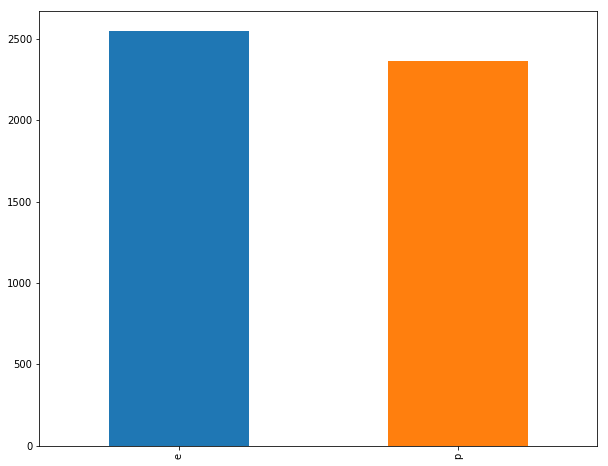

In [52]:
#Just a sample of bar plot for the V1 of e & p value
trainMushroomDataCategory.describe().T
trainMushroomDataCategory.V1.value_counts().plot.bar(stacked=True)

In [53]:
panda.DataFrame(trainMushroomDataCategory['V1'].value_counts()).reset_index()
groupedMushroomV2 = trainMushroomDataCategory.groupby(by='V2')
mushroomV1V2DataFrame = panda.DataFrame(groupedMushroomV2.V1.value_counts()).rename(columns={'V1':'count'}).reset_index()
mushroomV1V2DataFrame

,V2,V1,count
0,b,e,242
1,b,p,21
2,c,p,2
3,f,e,987
4,f,p,955
5,k,p,366
6,k,e,136
7,s,e,21
8,x,e,1161
9,x,p,1018


In [54]:
#Now we are trying to partitioning of the data in the k regeions, where the it can take number of values which is available 
# in the feature
maximumSum = 0
for columnValue in mushroomV1V2DataFrame['V2'].unique():
    countOfe = mushroomV1V2DataFrame.loc[(mushroomV1V2DataFrame['V2'] == columnValue) & (mushroomV1V2DataFrame['V1'] == 'e')]['count']
    countOfp = mushroomV1V2DataFrame.loc[(mushroomV1V2DataFrame['V2'] == columnValue) & (mushroomV1V2DataFrame['V1'] == 'p')]['count']
    try:
        countOfe = int(countOfe)
    except:
        countOfe = 0
    try:
        countOfp = int(countOfp)
    except:
        countOfp = 0
    print(countOfe,countOfp)
    maximumSum += numpy.max([countOfe,countOfp])
print(maximumSum/4907)


242 21
0 2
987 955
136 366
21 0
1161 1018
0.5663338088445078


In [55]:
#groupedMushroomV2.count()

In [56]:
numpy.sum(panda.DataFrame(trainMushroomDataCategory['V1'].value_counts()).reset_index()['V1'])

4909

In [58]:
#Computing and generatin the measure of the following items 
#'Feature Name','Accuracy','Gini Index','1-entropy'
purityDataFrameTable = panda.DataFrame(columns=['Feature Name','Accuracy','Gini Index','1-entropy'])
rowCount = numpy.sum(panda.DataFrame(trainMushroomDataCategory['V1'].value_counts()).reset_index()['V1'])
for index in range(2,24):
    feature = 'V{0}'.format(index)
    groupedFeature = trainMushroomDataCategory.groupby(by=feature)
    featureV1DataFrame = panda.DataFrame(groupedFeature.V1.value_counts()).rename(columns={'V1':'count'}).reset_index()
    maxSum,giniPurity,entropy = 0,0,0
    for columnValue in featureV1DataFrame[feature].unique():
        countOfe = featureV1DataFrame.loc[(featureV1DataFrame[feature] == columnValue) & (featureV1DataFrame['V1'] == 'e')]['count']
        countOfp = featureV1DataFrame.loc[(featureV1DataFrame[feature] == columnValue) & (featureV1DataFrame['V1'] == 'p')]['count']
        try:
            countOfe = int(countOfe)
        except:
            countOfe = 0
        try:
            countOfp = int(countOfp)
        except:
            countOfp = 0
        maxSum += numpy.max([countOfe,countOfp])
        giniPurity += ((countOfe/(countOfe+countOfp))**2 + (countOfp/(countOfe+countOfp))**2) * (countOfe+countOfp)
        probabilityOfe = countOfe / (countOfe + countOfp)
        probabilityOfp = countOfp / (countOfe + countOfp)
        if probabilityOfe == 0.0:
            entropy += ( probabilityOfp * numpy.log2(1 / probabilityOfp) ) * (countOfe + countOfp)
        elif probabilityOfp == 0.0:
            entropy += ( probabilityOfe * numpy.log2(1 / probabilityOfe) ) * (countOfe + countOfp)
        else:
            entropy += ( probabilityOfe * numpy.log2(1 / probabilityOfe) + probabilityOfp * numpy.log2(1 / probabilityOfp) ) * (countOfe + countOfp)
        
    accuracy = numpy.round(maxSum / rowCount, 4)
    giniPurity = numpy.round(giniPurity / rowCount, 4)
    entropy = numpy.round(entropy / rowCount, 4)
    purityDataFrameTable = purityDataFrameTable.append({'Feature Name' : feature, 'Accuracy' : accuracy, 'Gini Index' : giniPurity, '1-entropy' : numpy.round(1-entropy,4)},ignore_index=True)
purityDataFrameTable

,Feature Name,Accuracy,Gini Index,1-entropy
0,V2,0.5661,0.5330,0.0543
1,V3,0.5814,0.5205,0.0303
2,V4,0.5981,0.5248,0.0374
3,V5,0.7458,0.6285,0.1972
4,V6,0.9868,0.9743,0.9145
5,V7,0.5188,0.5073,0.0119
6,V8,0.6172,0.5623,0.1037
7,V9,0.7606,0.6502,0.2374
8,V10,0.8040,0.7326,0.4200
9,V11,0.5482,0.5049,0.0071


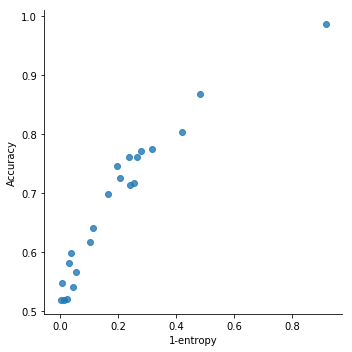

In [122]:
#Plotting te Accuracy and 1-Entropy respectively
seasns.lmplot(x='1-entropy',y='Accuracy', data=purityDataFrameTable,fit_reg=False)
pyplot.show()

In [60]:
purityDataFrameTable.loc[purityDataFrameTable['Gini Index'] == numpy.max(purityDataFrameTable['Gini Index'])]

,Feature Name,Accuracy,Gini Index,1-entropy
4,V6,0.9868,0.9743,0.9145


In [61]:
purityDataFrameTable.loc[purityDataFrameTable['Accuracy'] == numpy.max(purityDataFrameTable['Accuracy'])]

,Feature Name,Accuracy,Gini Index,1-entropy
4,V6,0.9868,0.9743,0.9145


In [62]:
purityDataFrameTable.loc[purityDataFrameTable['1-entropy'] == numpy.max(purityDataFrameTable['1-entropy'])]

,Feature Name,Accuracy,Gini Index,1-entropy
4,V6,0.9868,0.9743,0.9145


Feature name V6 is having the highest accuracy, 1-entropy, Gini Index values among the dataset, 
which is around V6	0.9868	0.9743	0.9145 respectively.

Feature name V17 is having lowest accuracy, 1-entropy, Gini Index values among the dataset,
which is around V17	0.5188	0.5007	0.0010 respectively.

# P3 : MUSHROOM Naive Bayes / Decision Tree

In [64]:
#importing the necessay packages

import numpy as numpy
import pandas as panda
import matplotlib.pyplot as pyplot
import seaborn as seasns

from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

In [65]:
#Reading the dataset of the train and test
trainMushroomData = panda.read_csv("D:/Mushroom/train.csv", index_col=0)
testMushroomData = panda.read_csv("D:/Mushroom/test.csv", index_col=0)

In [66]:
# We've the categorical dataset, so vectorizing it for easily computation
trainDictionaryValue = trainMushroomData.iloc[:,1:].T.to_dict().values()
trainCategoricalValue = DictVectorizer(sparse=False).fit_transform(trainDictionaryValue)

testDictionaryValue = testMushroomData.iloc[:,1:].T.to_dict().values()
testCategoricalValue = DictVectorizer(sparse=False).fit_transform(testDictionaryValue)

# Assinging the respective labels for the categorical data
labelEnc = LabelEncoder()
trainVectorValue = labelEnc.fit_transform(trainMushroomData.iloc[:,0])
testVectorValue = labelEnc.fit_transform(testMushroomData.iloc[:,0])

In [67]:
#Applying the Decision Tree classifier on the training dataset with the label
decisionTreeClassifier = tree.DecisionTreeClassifier(max_depth=10).fit(trainCategoricalValue,trainVectorValue)

In [68]:
decisionTreeClassifier.score(trainCategoricalValue,trainVectorValue)


1.0

In [69]:
decisionTreeClassifier.score(testCategoricalValue,testVectorValue)


1.0

In [70]:
#Setting the size threshold for the train and test data and plottin the accuracy for the same and applying the sizethreshold
# which is of 64 
decisionTreeaccuracies = panda.DataFrame(columns=['size_threshold','Train Accuracy','Test Accuracy'])
for size_threshold in range(4,65,2):
    decisionTreeClassifier = tree.DecisionTreeClassifier(min_samples_leaf=size_threshold,criterion='entropy').fit(trainCategoricalValue,trainVectorValue)
    trainAccuracy = numpy.round(decisionTreeClassifier.score(trainCategoricalValue,trainVectorValue),4)
    testAccuracy = numpy.round(decisionTreeClassifier.score(testCategoricalValue,testVectorValue),4)
    decisionTreeaccuracies = decisionTreeaccuracies.append({'size_threshold' : size_threshold,'Train Accuracy' : trainAccuracy,'Test Accuracy' : testAccuracy},ignore_index=True)
decisionTreeaccuracies.head()

,size_threshold,Train Accuracy,Test Accuracy
0,4.0,1.0000,1.0000
1,6.0,0.9992,0.9988
2,8.0,0.9992,0.9988
3,10.0,0.9984,0.9975
4,12.0,0.9984,0.9975


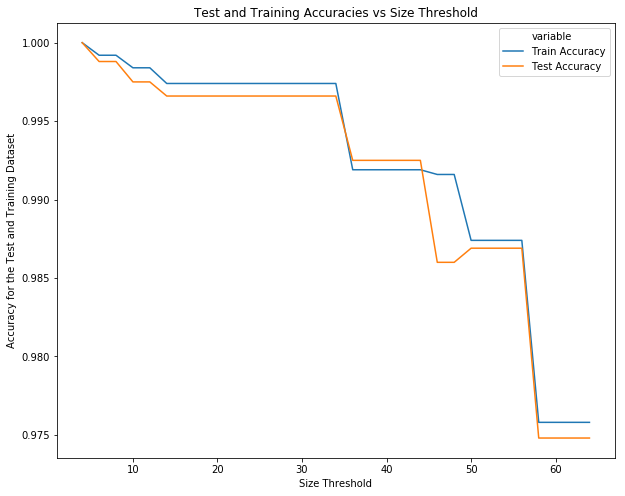

In [123]:
#Visualization of the Train and Test data accuracy
seasns.lineplot(x='size_threshold',y='value',hue='variable',
           data=decisionTreeaccuracies.melt(id_vars=['size_threshold'],value_vars=['Train Accuracy','Test Accuracy']),
           ci=0)
pyplot.xlabel('Size Threshold')
pyplot.ylabel('Accuracy for the Test and Training Dataset')
pyplot.title('Test and Training Accuracies vs Size Threshold')
pyplot.show();

In [72]:
#Applying the Naive Bayes Classifier on the train and test data with the lambda value until 50
naiveBayesAccuracy = panda.DataFrame(columns=['Laplacian Smoothing','Train Accuracy','Test Accuracy'])
for parameter in range(0,51):
    naiveBayesClassifier = MultinomialNB(alpha=parameter).fit(trainCategoricalValue,trainVectorValue)
    trainAccuracy = numpy.round(naiveBayesClassifier.score(trainCategoricalValue,trainVectorValue),4)
    testAccuracy = numpy.round(naiveBayesClassifier.score(testCategoricalValue,testVectorValue),4)
    naiveBayesAccuracy = naiveBayesAccuracy.append({'Laplacian Smoothing' : parameter,'Train Accuracy' : trainAccuracy,'Test Accuracy' : testAccuracy},ignore_index=True)
naiveBayesAccuracy.head()


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


,Laplacian Smoothing,Train Accuracy,Test Accuracy
0,0.0,0.9961,0.9944
1,1.0,0.9519,0.9406
2,2.0,0.9479,0.9365
3,3.0,0.9444,0.9334
4,4.0,0.9432,0.9316


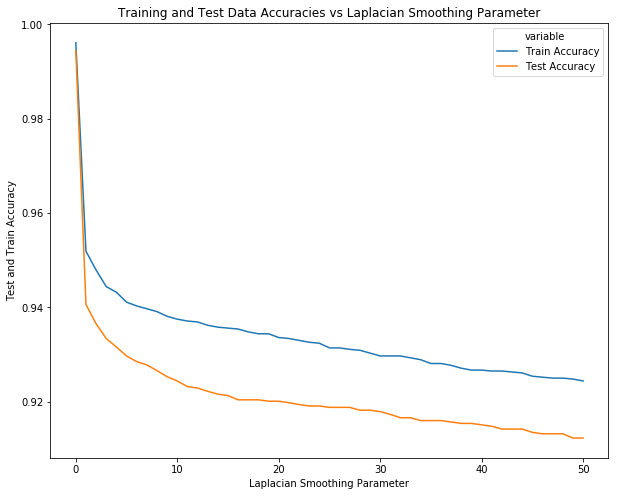

In [124]:
#Visualization of the Traing and Test Data accuracy 
seasns.lineplot(x='Laplacian Smoothing',y='value',hue='variable',
           data=naiveBayesAccuracy.melt(id_vars=['Laplacian Smoothing'],value_vars=['Train Accuracy','Test Accuracy']),
           ci=0)
pyplot.xlabel('Laplacian Smoothing Parameter')
pyplot.ylabel('Test and Train Accuracy')
pyplot.title('Training and Test Data Accuracies vs Laplacian Smoothing Parameter')
pyplot.show()

In [74]:
naiveBayesAccuracy.loc[naiveBayesAccuracy['Laplacian Smoothing'] == 10]['Train Accuracy']

10    0.9375
Name: Train Accuracy, dtype: float64

In [75]:
naiveBayesAccuracy.loc[naiveBayesAccuracy['Laplacian Smoothing'] == 30]['Test Accuracy']

30    0.9179
Name: Test Accuracy, dtype: float64

In [76]:
decisionTreeaccuracies.loc[decisionTreeaccuracies['size_threshold'] == 30]['Train Accuracy']

13    0.9974
Name: Train Accuracy, dtype: float64

In [77]:
decisionTreeaccuracies.loc[decisionTreeaccuracies['size_threshold'] == 10]['Test Accuracy']

3    0.9975
Name: Test Accuracy, dtype: float64

From the above classifier on the dataset, we can see clearly that Decision Tree classifier is giving the most accuracy, such as Decisioin Tree had given the accuracy until around 99% with the threshold value on the train and test dataset, whereas naive bayes had given only around 93% on the train dataset.

On the other hand the Laplacian Smoothing accuracy has been achived on the zero value, among the dataset.

# P4 : MNIST Bayesian

In [78]:
#Importing all necessary pacakages for this
import pandas as panda
import numpy as numpy
import matplotlib.pyplot as pyplot
import seaborn as seasns
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import scale

In [79]:
# reading all the training dataset file
pathLocation =r'D:/MNIST/'
allTrainFileList = glob.glob(pathLocation + "/train*.csv")
dataFrameCount = [0,1,2,3,4,5,6,7,8,9]
D0overAllTrainMnistDataFrame = panda.DataFrame()

for eachFileName in allTrainFileList:
    digitNumber = int( eachFileName[-5] )
    name = eachFileName[-10:]
    dataFrameCount[digitNumber] = panda.read_csv(eachFileName, low_memory=False).assign(trainLabelDigit=digitNumber)

In [80]:
# Concatenating all the inidividual file into one training data frame
for i in range(10):
    D0overAllTrainMnistDataFrame = panda.concat([D0overAllTrainMnistDataFrame, dataFrameCount[i] ])
#D0overAllTrainMnistDataFrame

In [81]:
#checking and removing the null values
D0afterRemovingTrainNullData=D0overAllTrainMnistDataFrame.dropna()
D0afterRemovingTrainNullData.isnull().values.any()

False

In [82]:
# reading all the test dataset file
pathLocation =r'D:/MNIST/'
allTestFileList = glob.glob(pathLocation + "/test*.csv")
dataFrameCount = [0,1,2,3,4,5,6,7,8,9]
D0overAllTestMnistDataFrame = panda.DataFrame()

for eachFileName in allTestFileList:
    digitNumber = int( eachFileName[-5] )
    dataFrameCount[digitNumber] = panda.read_csv(eachFileName, low_memory=False).assign(testLabelDigit=digitNumber)

In [83]:
# Concatenating all the inidividual file into one test data frame
for i in range(10):
    D0overAllTestMnistDataFrame = panda.concat([D0overAllTestMnistDataFrame, dataFrameCount[i] ])
#overAllTestMnistDataFrame

In [84]:
#checking and removing the null values
D0afterRemovingTestNullData=D0overAllTestMnistDataFrame.dropna()
D0afterRemovingTestNullData.isnull().values.any()

False

In [85]:
#overAllTrainMnistDataFrame

In [86]:
#overAllTestMnistDataFrame

In [101]:
trainData= D0afterRemovingTrainNullData.iloc[:,1:785].values
trainData = numpy.array(trainData)
trainLabel = D0afterRemovingTrainNullData['trainLabelDigit'].values
testData= D0afterRemovingTestNullData.iloc[:,1:785].values
testData = numpy.array(testData)
testLabel = D0afterRemovingTestNullData['testLabelDigit'].values

#PCA componennt
principalComponent = PCA(n_components=9)
principalComponent.fit(scale(trainData))
principalComponent.fit(scale(testData))

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [102]:
D1trainPca = principalComponent.transform(scale(trainData))
D1testPca = principalComponent.transform(scale(testData))
print ("After apply PCA of 9D in the Train Dataset: " , numpy.shape(D1trainPca))
print ("After apply PCA of 9D in the Test Dataset: " , numpy.shape(D1testPca))


After apply PCA of 9D in the Train Dataset:  (36072, 9)
After apply PCA of 9D in the Test Dataset:  (23928, 9)


In [103]:
# PCA Display content for the train data
D1trainedPca = panda.DataFrame(data=D1trainPca,columns=['data{0}'.format(i) for i in range(1,10)])
D1trainedPca['trainLabelDigit'] = D0afterRemovingTrainNullData['trainLabelDigit'].values
D1trainLabel = D0afterRemovingTrainNullData['trainLabelDigit'].values
D1trainedPca.head(5)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,trainLabelDigit
0,10.014784,-8.478746,-4.099156,-2.673812,2.649231,-4.532716,2.235972,2.620317,-0.783819,0
1,1.648697,-6.396833,-1.617121,-3.048482,-6.188484,0.834616,-0.852469,5.672614,-3.778756,0
2,5.668931,-7.814339,-2.032771,0.060216,-4.917238,-0.702270,0.146502,6.799583,-2.947974,0
3,16.309104,-4.642906,-7.173209,-10.154451,1.949705,-2.403176,-0.702239,-1.820033,1.912478,0
4,16.359448,5.071968,-2.499063,-2.696822,4.715145,-3.000675,-5.480519,-3.953317,-2.784697,0


In [104]:
# PCA Display content for the test data
D1testedPca = panda.DataFrame(data=D1testPca,columns=['data{0}'.format(i) for i in range(1,10)])
D1testedPca['testLabelDigit'] = D0afterRemovingTestNullData['testLabelDigit'].values
D1testLabel = D0afterRemovingTestNullData['testLabelDigit'].values
D1testedPca.head(5)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,testLabelDigit
0,8.410867,-7.923416,-3.678021,-1.649247,0.639471,-5.376872,0.095216,3.052660,0.442173,0
1,12.586321,-8.353812,-4.327408,-7.407870,0.014878,-1.915281,-0.296662,2.004890,-0.426974,0
2,11.238709,7.026347,4.272025,0.672947,14.987862,-0.880607,-0.383911,-2.284384,-0.182747,0
3,6.712126,-0.493622,-0.951106,-6.423076,-9.728314,-2.901034,-1.661752,3.037951,-2.464284,0
4,5.090669,-6.871721,-3.171356,-6.760502,-6.571474,-2.542265,-0.178252,4.532605,-1.874617,0


Populating the interactive namespace from numpy and matplotlib


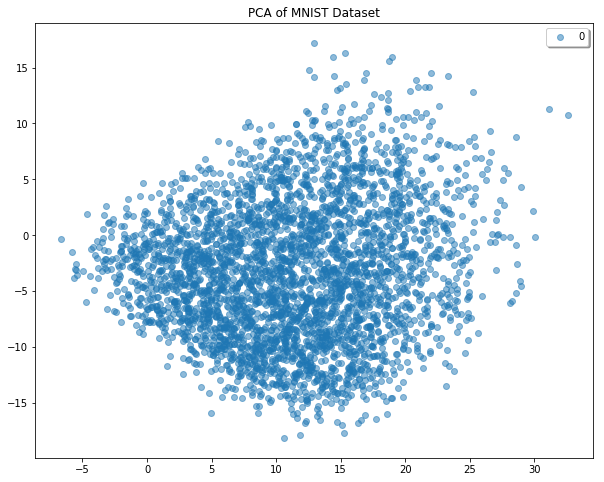

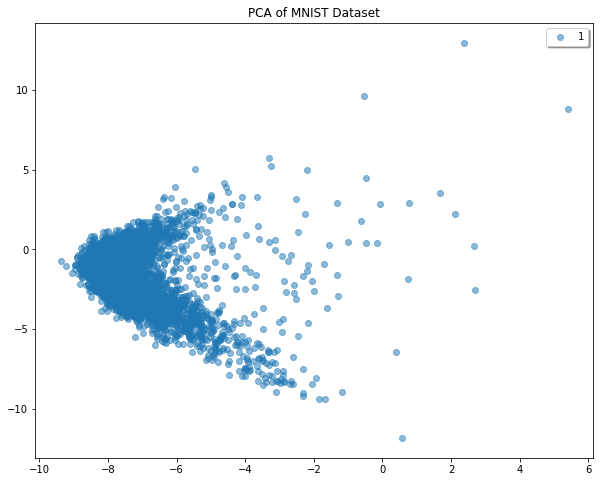

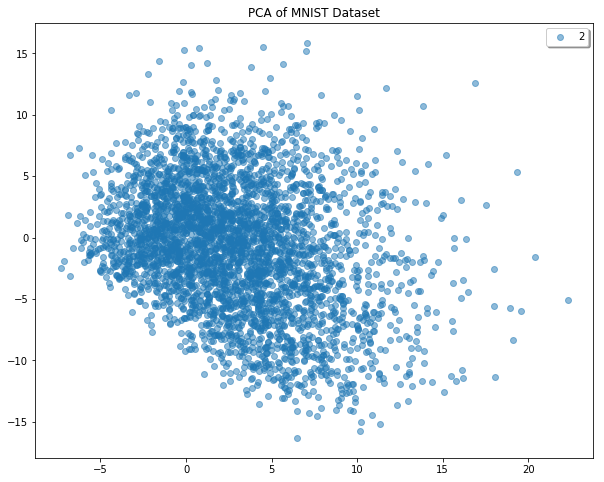

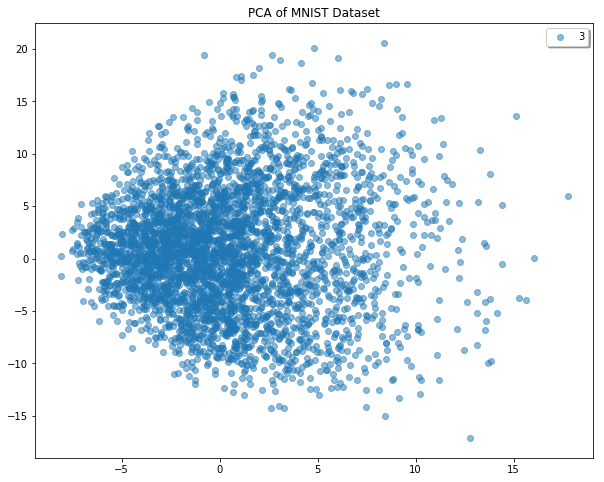

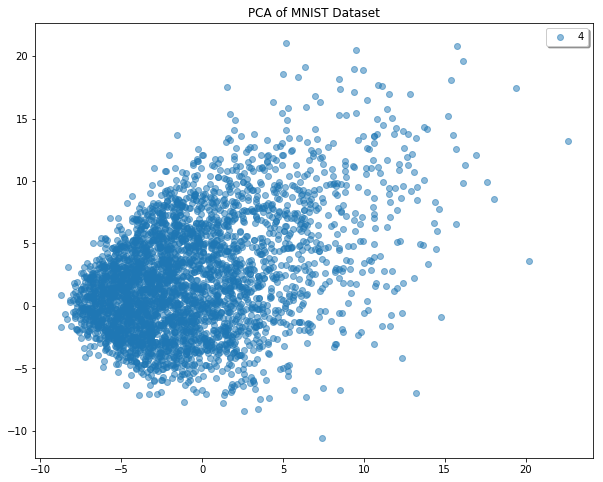

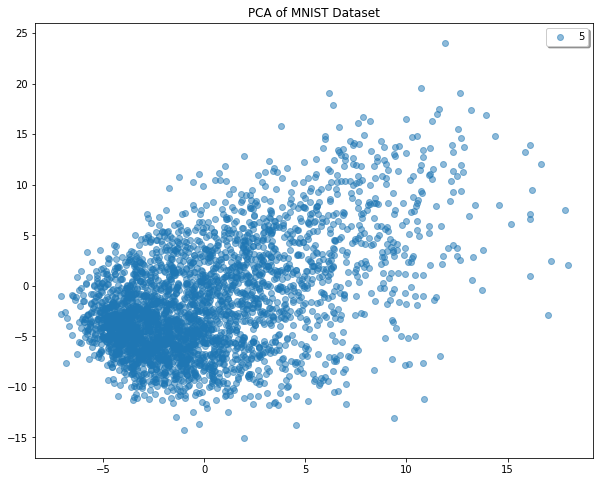

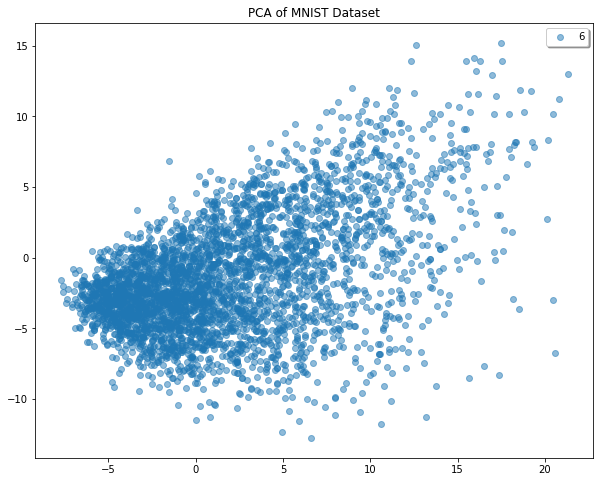

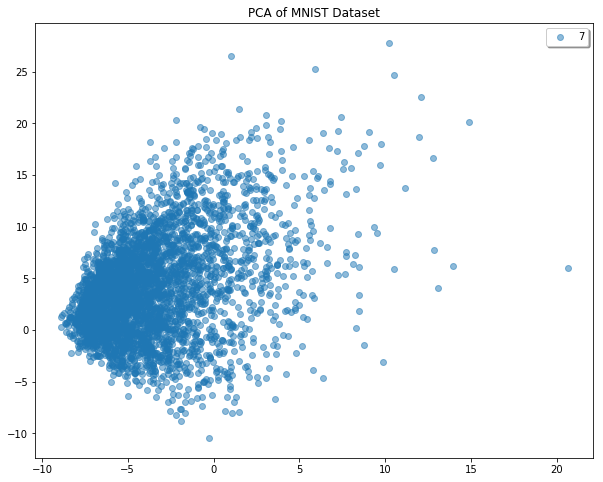

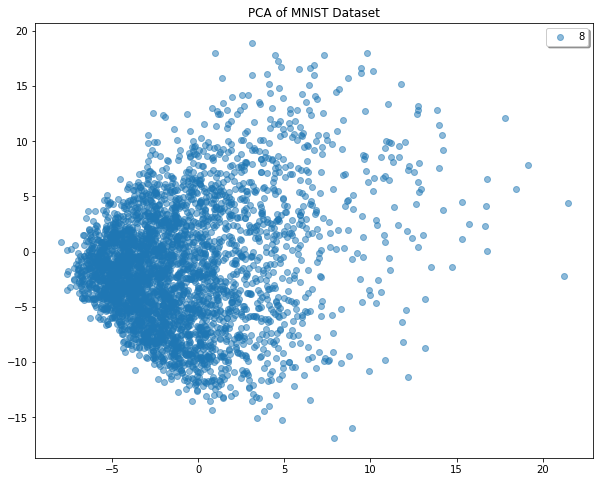

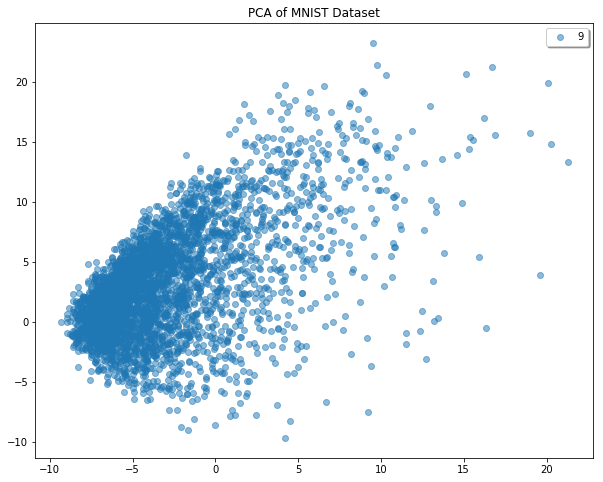

In [100]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
pyplot.figure()
for i in  [0, 1, 2,3,4,5,6,7,8,9]:
    pyplot.scatter(D1trainPca[trainLabel == i, 0], D1trainPca[trainLabel == i, 1],alpha=0.5, label=i)
    pyplot.legend(loc='best', shadow=True, scatterpoints=1)
    pyplot.title('PCA of MNIST Dataset')
    pyplot.show()

In [105]:
# Applying the LDA model and showing the first few records of the train data
D2trainLDA = LinearDiscriminantAnalysis(n_components=9).fit_transform(scale(trainData),D0afterRemovingTrainNullData.iloc[:,785].astype('int'))

D2trainedLDA = panda.DataFrame(data=D2trainLDA,columns=['data{0}'.format(i) for i in range(1,10)])
D2trainedLDA['trainLabelDigit'] = D0afterRemovingTrainNullData['trainLabelDigit'].values
D2trainLDALabel = D0afterRemovingTrainNullData['trainLabelDigit'].values
D2trainedLDA.head(5)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,data1,data2,data3,data4,data5,data6,data7,data8,data9,trainLabelDigit
0,-1.989590,-2.552597,-4.022813,0.381112,-2.693190,-0.975274,1.482805,0.399358,0.329946,0
1,-2.865192,-0.808211,-0.666237,0.697119,-0.419694,0.361769,-1.342088,-1.225928,-1.092532,0
2,-3.969842,-3.384732,-1.378059,-0.186808,-2.249832,-0.488083,0.574454,-0.889368,-0.794879,0
3,-3.072138,-2.924267,-5.132279,0.009568,-0.956713,-1.073792,-0.380606,-0.302713,-1.126715,0
4,-3.696011,-4.270487,-3.956524,1.249569,-2.794147,-1.656075,-1.614621,-0.058305,0.104304,0


In [106]:
# Applying the LDA model and showing the first few records of the test data
D2testLDA = LinearDiscriminantAnalysis(n_components=9).fit_transform(scale(testData),D0afterRemovingTestNullData.iloc[:,785].astype('int'))

D2testedLDA = panda.DataFrame(data=D2testLDA,columns=['data{0}'.format(i) for i in range(1,10)])
D2testedLDA['testLabelDigit'] = D0afterRemovingTestNullData['testLabelDigit'].values
D2trainLDALabel = D0afterRemovingTestNullData['testLabelDigit'].values
D2testedLDA.head(5)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,data1,data2,data3,data4,data5,data6,data7,data8,data9,testLabelDigit
0,-2.853047,-3.185087,-2.989078,0.014582,-2.957486,-0.468036,0.705624,-0.768669,-0.215488,0
1,-3.241525,-2.661756,-2.989763,0.036613,-1.275887,0.168705,1.715272,-3.580824,1.154638,0
2,-2.699560,-1.202041,-3.803232,0.056027,-0.141081,-2.324777,-0.225811,1.173896,0.258099,0
3,-3.461861,-2.929060,-2.843383,-0.044170,-0.104403,0.135923,-0.086588,-1.290421,1.186412,0
4,-3.487327,-2.523260,-2.580716,0.578677,-0.666242,0.634917,-0.569939,-0.045877,0.273623,0


In [107]:
#Building Bayesian Classifier
trainD1X = D1trainedPca.iloc[:,:9]
trainD1Y = D1trainedPca.iloc[:,9].astype('int')

testD1X = D1testedPca.iloc[:,:9]
testD1Y = D1testedPca.iloc[:,9].astype('int')

trainD2X = D2trainedLDA.iloc[:,:9]
trainD2Y = D2trainedLDA.iloc[:,9].astype('int')

testD2X = D2testedLDA.iloc[:,:9]
testD2Y = D2testedLDA.iloc[:,9].astype('int')

In [108]:
bayesianClassifierAccuracy = panda.DataFrame(columns=['Dataset','Covariance','Test Accuracy'])

In [109]:
#Digonal covariance of D1 dataset
bayesianD1DiagonalCovariance = BayesianGaussianMixture(n_components=10,covariance_type='diag',max_iter=100000)
bayesianD1DiagonalCovariance = bayesianD1DiagonalCovariance.fit(trainD1X,trainD1Y)
bayesianD1DiagonalDf = panda.DataFrame({'actual':testD1Y,'predicted':bayesianD1DiagonalCovariance.predict(testD1X)})
bayesianClassifierAccuracy = bayesianClassifierAccuracy.append(
    {'Dataset':'D1',
     'Covariance':'Diagonal',
     'Test Accuracy':np.round(bayesianD1DiagonalDf.loc[bayesianD1DiagonalDf['actual'] == bayesianD1DiagonalDf['predicted']].shape[0]/bayesianD1DiagonalDf.shape[0],4)},ignore_index=True)
bayesianClassifierAccuracy

,Dataset,Covariance,Test Accuracy
0,D1,Diagonal,0.0296


In [110]:
#Full covariance of D1 dataset
bayesianD1FullCovariance = BayesianGaussianMixture(n_components=10,covariance_type='full',max_iter=10000)
bayesianD1FullCovariance = bayesianD1FullCovariance.fit(trainD1X,trainD1Y)
bayesianD1FullDf = panda.DataFrame({'actual':testD1Y,'predicted':bayesianD1FullCovariance.predict(testD1X)})
bayesianClassifierAccuracy = bayesianClassifierAccuracy.append(
	{'Dataset':'D1',
	'Covariance':'Full',
	'Test Accuracy':np.round(bayesianD1FullDf.loc[bayesianD1FullDf['actual'] == bayesianD1FullDf['predicted']].shape[0]/bayesianD1FullDf.shape[0],4)},ignore_index=True)
bayesianClassifierAccuracy

,Dataset,Covariance,Test Accuracy
0,D1,Diagonal,0.0296
1,D1,Full,0.2182


In [111]:
#Digonal covariance of D2 dataset
bayesianD2DiagonalCovariance = BayesianGaussianMixture(n_components=10,covariance_type='diag',max_iter=100000)
bayesianD2DiagonalCovariance = bayesianD2DiagonalCovariance.fit(trainD2X,trainD2Y)
bayesianD2DiagonalDf = panda.DataFrame({'actual':testD2Y,'predicted':bayesianD2DiagonalCovariance.predict(testD2X)})
bayesianClassifierAccuracy = bayesianClassifierAccuracy.append(
    {'Dataset':'D2',
     'Covariance':'Diagonal',
     'Test Accuracy':np.round(bayesianD2DiagonalDf.loc[bayesianD2DiagonalDf['actual'] == bayesianD2DiagonalDf['predicted']].shape[0]/bayesianD2DiagonalDf.shape[0],4)},ignore_index=True)
bayesianClassifierAccuracy

,Dataset,Covariance,Test Accuracy
0,D1,Diagonal,0.0296
1,D1,Full,0.2182
2,D2,Diagonal,0.1094


In [112]:
#Full covariance of D2 dataset
bayesianD2FullCovariance = BayesianGaussianMixture(n_components=10,covariance_type='full',max_iter=10000)
bayesianD2FullCovariance = bayesianD2FullCovariance.fit(trainD2X,trainD2Y)
bayesianD2FullDf = panda.DataFrame({'actual':testD2Y,'predicted':bayesianD2FullCovariance.predict(testD2X)})
bayesianClassifierAccuracy = bayesianClassifierAccuracy.append(
	{'Dataset':'D2',
	'Covariance':'Full',
	'Test Accuracy':np.round(bayesianD2FullDf.loc[bayesianD2FullDf['actual'] == bayesianD2FullDf['predicted']].shape[0]/bayesianD2FullDf.shape[0],4)},ignore_index=True)
bayesianClassifierAccuracy

,Dataset,Covariance,Test Accuracy
0,D1,Diagonal,0.0296
1,D1,Full,0.2182
2,D2,Diagonal,0.1094
3,D2,Full,0.1773


-> As we can see the Full covariance matrix has the better accuracy with respective to the Diagonal covariance matrix  from the dataset we've considered. For D1 Full is around 21.82% and D2 Full is around 17.73%, whereas for D1 & D2 Diagonal covariance matrix is around 2% & 10.94% respectively 

# P5 : MNIST –kNN / Parzenwindow

In [1]:
#Importing all the necessary pacakages
import pandas as panda
import numpy as numpy
import matplotlib.pyplot as pyplot
import seaborn as seasns
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# reading all the training dataset file
pathLocation =r'D:/MNIST/'
allTrainFileList = glob.glob(pathLocation + "/train*.csv")
dataFrameCount = [0,1,2,3,4,5,6,7,8,9]
D0overAllTrainMnistDataFrame = panda.DataFrame()

for eachFileName in allTrainFileList:
    digitNumber = int( eachFileName[-5] )
    name = eachFileName[-10:]
    dataFrameCount[digitNumber] = panda.read_csv(eachFileName, low_memory=False).assign(trainLabelDigit=digitNumber)

In [3]:
# Concatenating all the inidividual file into one test data frame
for index in range(10):
    D0overAllTrainMnistDataFrame = panda.concat([D0overAllTrainMnistDataFrame, dataFrameCount[index] ])

In [4]:
# Checking and removing the null values
D0afterRemovingTrainNullData=D0overAllTrainMnistDataFrame.dropna()
D0afterRemovingTrainNullData.isnull().values.any()

False

In [5]:
# reading all the test dataset file
pathLocation =r'D:/MNIST/'
allTestFileList = glob.glob(pathLocation + "/test*.csv")
dataFrameCount = [0,1,2,3,4,5,6,7,8,9]
D0overAllTestMnistDataFrame = panda.DataFrame()

for eachFileName in allTestFileList:
    digitNumber = int( eachFileName[-5] )
    dataFrameCount[digitNumber] = panda.read_csv(eachFileName, low_memory=False).assign(testLabelDigit=digitNumber)

In [6]:
# Concatenating all the inidividual file into one test data frame
for i in range(10):
    D0overAllTestMnistDataFrame = panda.concat([D0overAllTestMnistDataFrame, dataFrameCount[i] ])
#D0overAllTestMnistDataFrame

In [7]:
# Checking and removing the null values
D0afterRemovingTestNullData=D0overAllTestMnistDataFrame.dropna()
D0afterRemovingTestNullData.isnull().values.any()

False

In [8]:
trainData= D0afterRemovingTrainNullData.iloc[:,1:785].values
trainData = numpy.array(trainData)
trainLabel = D0afterRemovingTrainNullData['trainLabelDigit'].values
testData= D0afterRemovingTestNullData.iloc[:,1:785].values
testData = numpy.array(testData)
testLabel = D0afterRemovingTestNullData['testLabelDigit'].values
#PCA components
principalComponent = PCA(n_components=9)
principalComponent.fit(scale(trainData))
principalComponent.fit(scale(testData))

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
D1trainPca = principalComponent.transform(scale(trainData))
D1testPca = principalComponent.transform(scale(testData))
print ("After apply PCA of 9D in the Train Dataset: " , numpy.shape(D1trainPca))
print ("After apply PCA of 9D in the Test Dataset: " , numpy.shape(D1testPca))


After apply PCA of 9D in the Train Dataset:  (36072, 9)
After apply PCA of 9D in the Test Dataset:  (23928, 9)


In [10]:
# PCA components and it's values of the training dataset
D1trainedPca = panda.DataFrame(data=D1trainPca,columns=['data{0}'.format(i) for i in range(1,10)])
D1trainedPca['trainLabelDigit'] = D0afterRemovingTrainNullData['trainLabelDigit'].values
D1trainLabel = D0afterRemovingTrainNullData['trainLabelDigit'].values
D1trainedPca.head(5)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,trainLabelDigit
0,10.014784,-8.478742,-4.099161,-2.673811,2.649247,-4.532675,2.233239,2.620244,-0.766785,0
1,1.648696,-6.396856,-1.617129,-3.048402,-6.189880,0.836965,-0.866619,5.650072,-3.795808,0
2,5.668931,-7.814355,-2.032747,0.060342,-4.917621,-0.701483,0.136411,6.775889,-2.997330,0
3,16.309103,-4.642912,-7.173255,-10.154501,1.948888,-2.402687,-0.707524,-1.815834,1.969469,0
4,16.359448,5.071965,-2.498982,-2.697036,4.717684,-3.004744,-5.462357,-3.946463,-2.763856,0


In [11]:
# PCA components and it's values of the training dataset
D1testedPca = panda.DataFrame(data=D1testPca,columns=['data{0}'.format(i) for i in range(1,10)])
D1testedPca['testLabelDigit'] = D0afterRemovingTestNullData['testLabelDigit'].values
D1testLabel = D0afterRemovingTestNullData['testLabelDigit'].values
D1testedPca.head(5)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,testLabelDigit
0,8.410867,-7.923418,-3.678028,-1.649067,0.639161,-5.376384,0.089698,3.046133,0.422431,0
1,12.586321,-8.353810,-4.327431,-7.407825,0.015056,-1.913874,-0.301049,2.011765,-0.460593,0
2,11.238709,7.026334,4.272155,0.672997,14.990875,-0.884120,-0.369087,-2.297157,-0.276166,0
3,6.712125,-0.493642,-0.951081,-6.423125,-9.728542,-2.899691,-1.667321,3.022543,-2.462610,0
4,5.090668,-6.871736,-3.171334,-6.760406,-6.571658,-2.541326,-0.184032,4.517267,-1.897286,0


Populating the interactive namespace from numpy and matplotlib


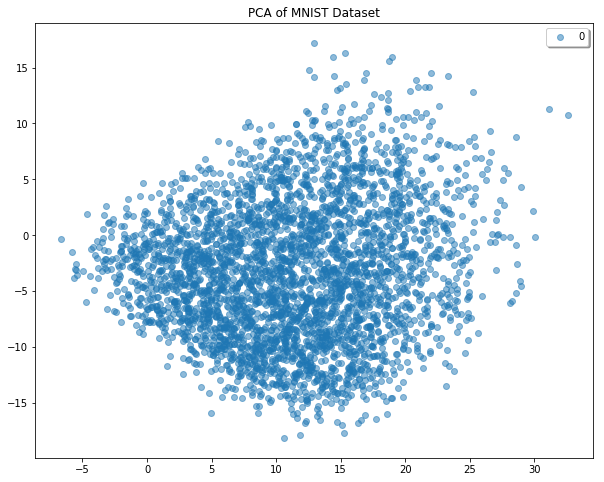

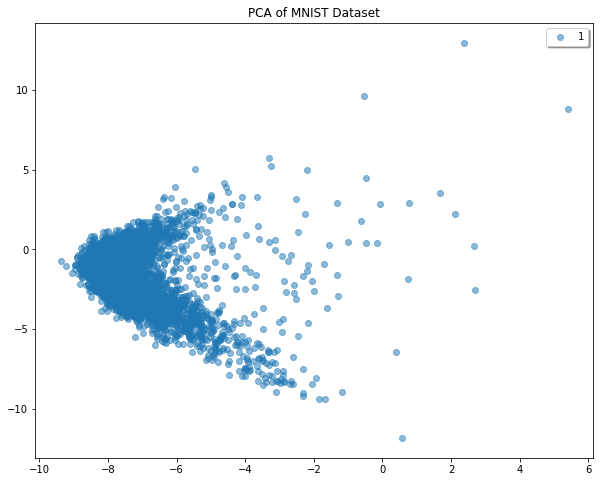

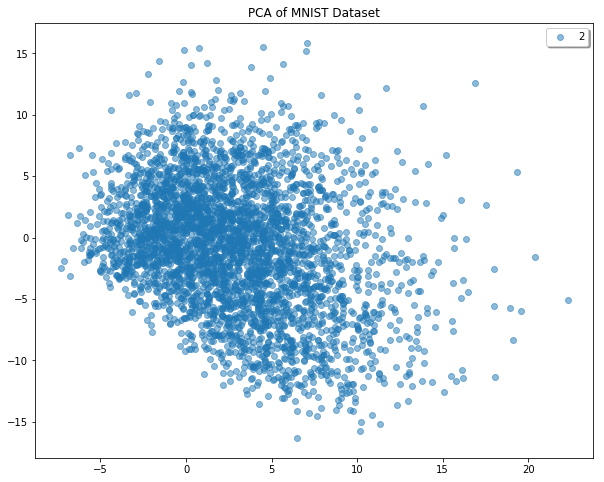

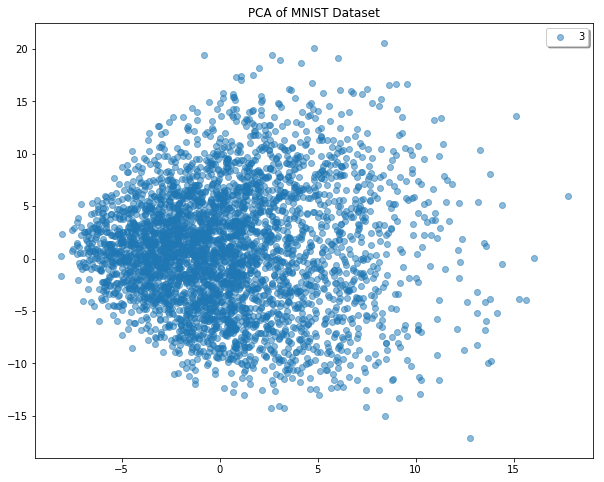

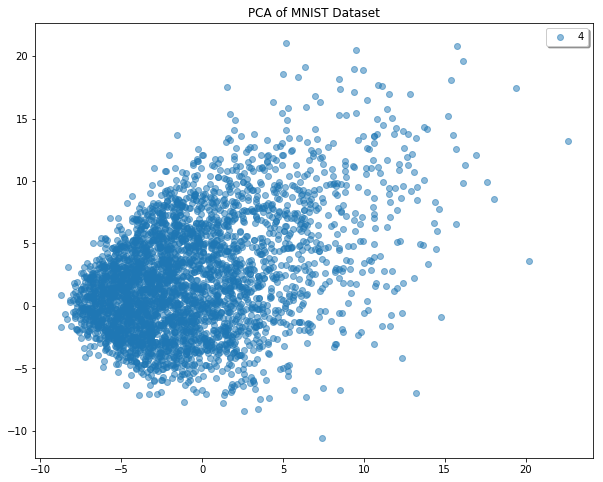

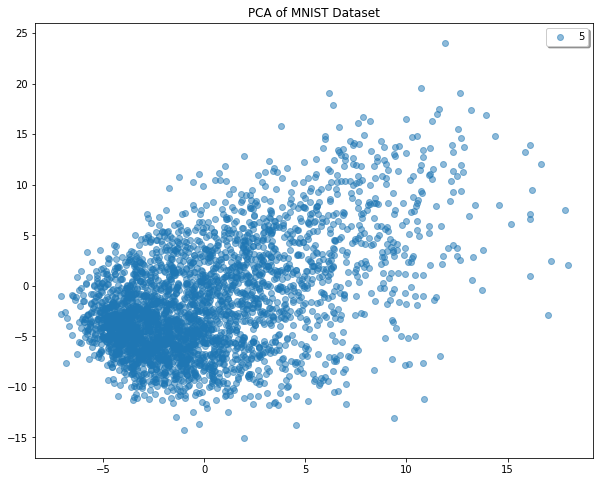

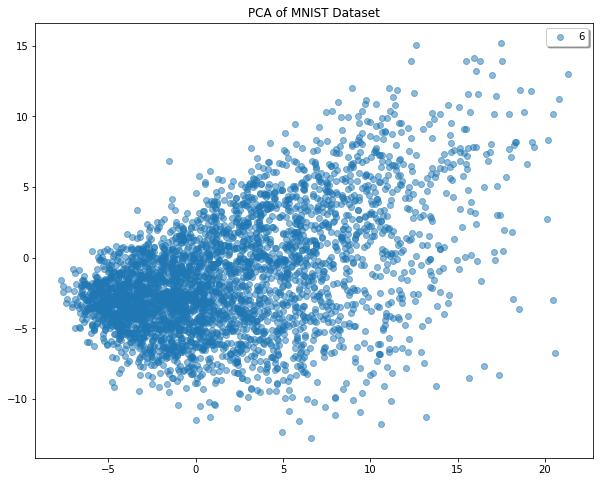

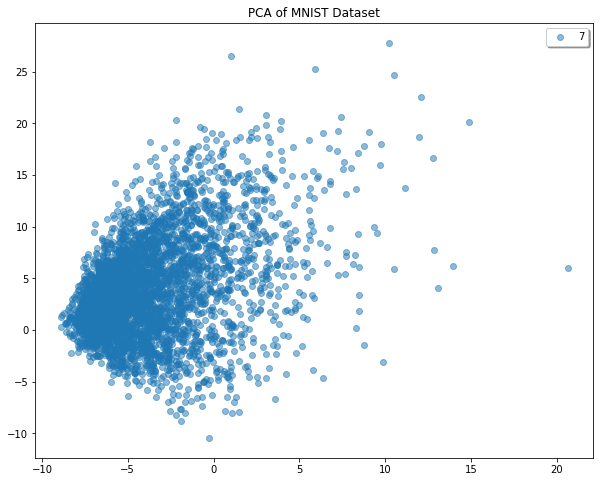

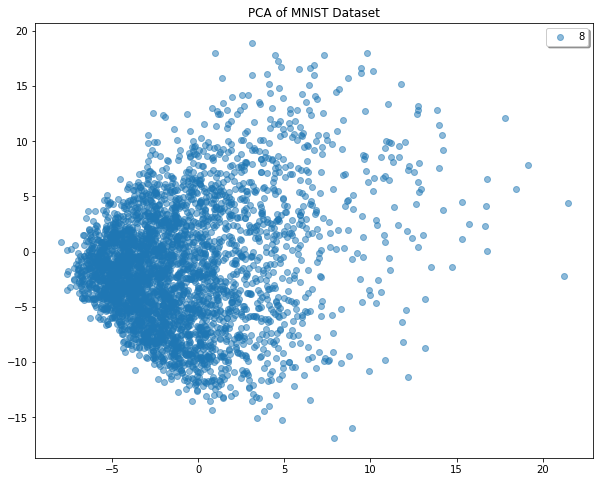

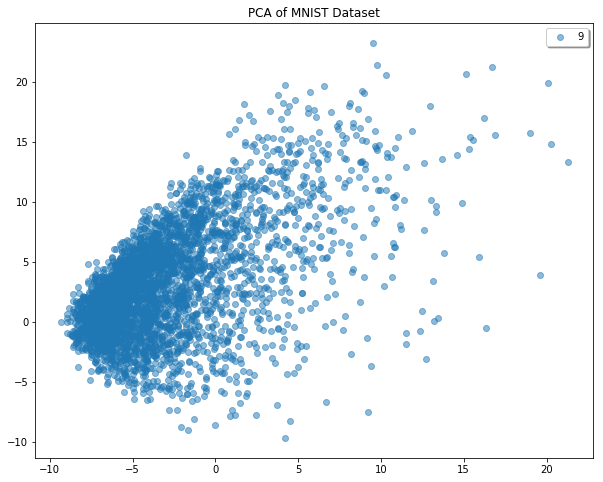

In [12]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
pyplot.figure()
for i in  [0, 1, 2,3,4,5,6,7,8,9]:
    pyplot.scatter(D1trainPca[trainLabel == i, 0], D1trainPca[trainLabel == i, 1],alpha=0.5, label=i)
    pyplot.legend(loc='best', shadow=True, scatterpoints=1)
    pyplot.title('PCA of MNIST Dataset')
    pyplot.show()

In [13]:
# Applying and Displaying the LDA values on the training dataset
D2trainLDA = LinearDiscriminantAnalysis(n_components=9).fit_transform(scale(trainData),D0afterRemovingTrainNullData.iloc[:,785].astype('int'))

D2trainedLDA = panda.DataFrame(data=D2trainLDA,columns=['data{0}'.format(i) for i in range(1,10)])
D2trainedLDA['trainLabelDigit'] = D0afterRemovingTrainNullData['trainLabelDigit'].values
D2trainLDALabel = D0afterRemovingTrainNullData['trainLabelDigit'].values
D2trainedLDA.head(5)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,data1,data2,data3,data4,data5,data6,data7,data8,data9,trainLabelDigit
0,-1.989590,-2.552597,-4.022813,0.381112,-2.693190,-0.975274,1.482805,0.399358,0.329946,0
1,-2.865192,-0.808211,-0.666237,0.697119,-0.419694,0.361769,-1.342088,-1.225928,-1.092532,0
2,-3.969842,-3.384732,-1.378059,-0.186808,-2.249832,-0.488083,0.574454,-0.889368,-0.794879,0
3,-3.072138,-2.924267,-5.132279,0.009568,-0.956713,-1.073792,-0.380606,-0.302713,-1.126715,0
4,-3.696011,-4.270487,-3.956524,1.249569,-2.794147,-1.656075,-1.614621,-0.058305,0.104304,0


In [14]:
# Applying and Displaying the LDA values on the test dataset
D2testLDA = LinearDiscriminantAnalysis(n_components=9).fit_transform(scale(testData),D0afterRemovingTestNullData.iloc[:,785].astype('int'))

D2testedLDA = panda.DataFrame(data=D2testLDA,columns=['data{0}'.format(i) for i in range(1,10)])
D2testedLDA['testLabelDigit'] = D0afterRemovingTestNullData['testLabelDigit'].values
D2trainLDALabel = D0afterRemovingTestNullData['testLabelDigit'].values
D2testedLDA.head(5)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,data1,data2,data3,data4,data5,data6,data7,data8,data9,testLabelDigit
0,-2.853047,-3.185087,-2.989078,0.014582,-2.957486,-0.468036,0.705624,-0.768669,-0.215488,0
1,-3.241525,-2.661756,-2.989763,0.036613,-1.275887,0.168705,1.715272,-3.580824,1.154638,0
2,-2.699560,-1.202041,-3.803232,0.056027,-0.141081,-2.324777,-0.225811,1.173896,0.258099,0
3,-3.461861,-2.929060,-2.843383,-0.044170,-0.104403,0.135923,-0.086588,-1.290421,1.186412,0
4,-3.487327,-2.523260,-2.580716,0.578677,-0.666242,0.634917,-0.569939,-0.045877,0.273623,0


In [15]:
#k-Nearest Dataset will be retrieving it from here for our further analysis will be picking up from here
trainD1X = D1trainedPca.iloc[:,:9]
trainD1Y = D1trainedPca.iloc[:,9].astype('int')

testD1X = D1testedPca.iloc[:,:9]
testD1Y = D1testedPca.iloc[:,9].astype('int')

trainD2X = D2trainedLDA.iloc[:,:9]
trainD2Y = D2trainedLDA.iloc[:,9].astype('int')

testD2X = D2testedLDA.iloc[:,:9]
testD2Y = D2testedLDA.iloc[:,9].astype('int')

In [16]:
#Forming the dataframe of the two dataset
dataset1KNN = panda.DataFrame(columns=['k-value','Type of Data','Accuracy'])
dataset2KNN = panda.DataFrame(columns=['k-value','Type of Data','Accuracy'])

In [17]:
#Looping through with for knn with the range of 17
for k in range(1,18,2):
    KNNData1 = KNeighborsClassifier(n_neighbors=k).fit(trainD1X,trainD1Y)
    KNNData2 = KNeighborsClassifier(n_neighbors=k).fit(trainD2X,trainD2Y)
    dataset1KNN = dataset1KNN.append({'k-value' : k, 'Type of Data' : 'training', 'Accuracy' : np.round(KNNData1.score(trainD1X,trainD1Y),4)},ignore_index=True)
    dataset1KNN = dataset1KNN.append({'k-value' : k, 'Type of Data' : 'test', 'Accuracy' : np.round(KNNData1.score(testD1X,testD1Y),4)},ignore_index=True)
    dataset2KNN = dataset2KNN.append({'k-value' : k, 'Type of Data' : 'training', 'Accuracy' : np.round(KNNData2.score(trainD2X,trainD2Y),4)},ignore_index=True)
    dataset2KNN = dataset2KNN.append({'k-value' : k, 'Type of Data' : 'test', 'Accuracy' : np.round(KNNData2.score(testD2X,testD2Y),4)},ignore_index=True)

In [18]:
dataset1KNN.head()

,k-value,Type of Data,Accuracy
0,1,training,1.0000
1,1,test,0.8637
2,3,training,0.9316
3,3,test,0.8797
4,5,training,0.9196


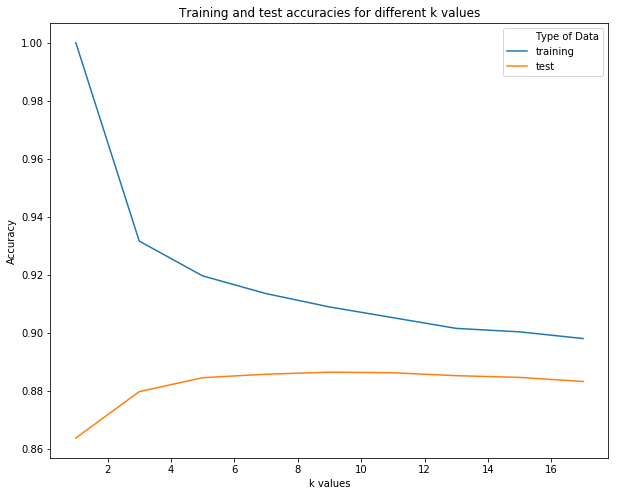

In [19]:
#Plotting training and test accuracy for kNN Classification of Dataset1
seasns.lineplot(x='k-value',y='Accuracy',hue='Type of Data',data=dataset1KNN,ci=0,)
plt.title('Training and test accuracies for different k values')
plt.ylabel('Accuracy')
plt.xlabel('k values')
plt.show();

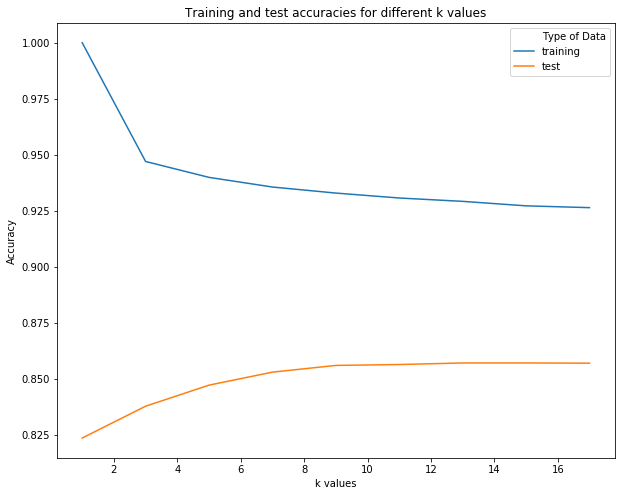

In [20]:
#Plotting training and test accuracy for kNN Classification of Dataset1
seasns.lineplot(x='k-value',y='Accuracy',hue='Type of Data',data=dataset2KNN,ci=0,)
plt.title('Training and test accuracies for different k values')
plt.ylabel('Accuracy')
plt.xlabel('k values')
plt.show();

In [21]:
D1trainedPca.groupby('trainLabelDigit', group_keys=False).count()

,data1,data2,data3,data4,data5,data6,data7,data8,data9
trainLabelDigit,,,,,,,,,
0,3564,3564,3564,3564,3564,3564,3564,3564,3564
1,4058,4058,4058,4058,4058,4058,4058,4058,4058
2,3583,3583,3583,3583,3583,3583,3583,3583,3583
3,3689,3689,3689,3689,3689,3689,3689,3689,3689
4,3512,3512,3512,3512,3512,3512,3512,3512,3512
5,3250,3250,3250,3250,3250,3250,3250,3250,3250
6,3559,3559,3559,3559,3559,3559,3559,3559,3559
7,3764,3764,3764,3764,3764,3764,3764,3764,3764
8,3516,3516,3516,3516,3516,3516,3516,3516,3516


In [22]:
D1testedPca.groupby('testLabelDigit', group_keys=False).count()

,data1,data2,data3,data4,data5,data6,data7,data8,data9
testLabelDigit,,,,,,,,,
0,2359,2359,2359,2359,2359,2359,2359,2359,2359
1,2684,2684,2684,2684,2684,2684,2684,2684,2684
2,2375,2375,2375,2375,2375,2375,2375,2375,2375
3,2442,2442,2442,2442,2442,2442,2442,2442,2442
4,2330,2330,2330,2330,2330,2330,2330,2330,2330
5,2171,2171,2171,2171,2171,2171,2171,2171,2171
6,2359,2359,2359,2359,2359,2359,2359,2359,2359
7,2501,2501,2501,2501,2501,2501,2501,2501,2501
8,2335,2335,2335,2335,2335,2335,2335,2335,2335


In [23]:
D1trainedPca = D1trainedPca.groupby('trainLabelDigit', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))
D1testedPca = D1testedPca.groupby('testLabelDigit', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))

D2trainedLDA = D2trainedLDA.groupby('trainLabelDigit', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))
D2testedLDA = D2testedLDA.groupby('testLabelDigit', group_keys=False).apply(lambda x: x.sample(min(len(x), 10)))

trainD1X = D1trainedPca.iloc[:,:9]
trainD1Y = D1trainedPca.iloc[:,9].astype('int')

testD1X = D1testedPca.iloc[:,:9]
testD1Y = D1testedPca.iloc[:,9].astype('int')

trainD2X = D2trainedLDA.iloc[:,:9]
trainD2Y = D2trainedLDA.iloc[:,9].astype('int')

testD2X = D2testedLDA.iloc[:,:9]
testD2Y = D2testedLDA.iloc[:,9].astype('int')

In [40]:
def trainD1Set(xData,yData,sigma):
    dist = np.linalg.norm(xData - yData)
    expsigmaValue = np.exp(-dist**2/(2*sigma**2)) / sigma
    return expsigmaValue

In [41]:
def D1Prediction(xData,sigma):
    D1PredictionDictionary = dict()
    for index in range(10):
        d1trainlabel = D1trainedPca.loc[D1trainedPca['trainLabelDigit'] == index]
        expsigmaValue = d1trainlabel.apply(lambda yData:trainD1Set(xData,yData[:9],sigma),axis=1)
        D1PredictionDictionary[index] = expsigmaValue.sum()
    prediction = max(D1PredictionDictionary, key=D1PredictionDictionary.get)
    return prediction

In [42]:
def D2Prediction(xData,sigma):
    D2PredictionDictionary = dict()
    for index in range(10):
        d2trainlabel = D2trainedLDA.loc[D2trainedLDA['trainLabelDigit'] == index]
        expsigmaValue = d2trainlabel.apply(lambda yData:trainD1Set(xData,yData[:9],sigma),axis=1)
        D2PredictionDictionary[index] = expsigmaValue.sum()
    prediction = max(D2PredictionDictionary, key=D2PredictionDictionary.get)
    return prediction

In [45]:
#Parzen Window for the Dataset 1
parzenAccuracyD1 = panda.DataFrame(columns=['sigma','Train Accuracy','Test Accuracy'])
for sigma in [x/10.0 for x in range(1,31,1)]:
    predictedLabel = testD1X.apply(lambda row:D1Prediction(row,sigma),axis=1)
    testAccuracyDF = panda.DataFrame({'actual' : testD1Y,'predicted' : predictedLabel})
    testAccuracy = numpy.round(testAccuracyDF.loc[testAccuracyDF['actual'] == testAccuracyDF['predicted']].shape[0] / testAccuracyDF.shape[0], 4)
    predictedLabel = trainD1X.apply(lambda row:D1Prediction(row,sigma),axis=1)
    trainAccuracyDF = panda.DataFrame({'actual' : trainD1Y,'predicted' : predictedLabel})
    trainAccuracy = numpy.round(trainAccuracyDF.loc[trainAccuracyDF['actual'] == trainAccuracyDF['predicted']].shape[0] / trainAccuracyDF.shape[0], 4)
    parzenAccuracyD1 = parzenAccuracyD1.append({'sigma' : sigma, 'Train Accuracy' : trainAccuracy, 'Test Accuracy' : testAccuracy},ignore_index=True)

In [29]:
#Parzen Window for the Dataset 2
parzenAccuracyD2 = panda.DataFrame(columns=['sigma','Train Accuracy','Test Accuracy'])
for sigma in [x/10.0 for x in range(1,31,1)]:
    predictedLabel = testD2X.apply(lambda row:D2Prediction(row,sigma),axis=1)
    testAccuracyDF = panda.DataFrame({'actual' : testD2Y,'predicted' : predictedLabel})
    testAccuracy = numpy.round(testAccuracyDF.loc[testAccuracyDF['actual'] == testAccuracyDF['predicted']].shape[0] / testAccuracyDF.shape[0], 4)
    predictedLabel = trainD2X.apply(lambda row:D2Prediction(row,sigma),axis=1)
    trainAccuracyDF = panda.DataFrame({'actual' : trainD2Y,'predicted' : predictedLabel})
    trainAccuracy = numpy.round(trainAccuracyDF.loc[trainAccuracyDF['actual'] == trainAccuracyDF['predicted']].shape[0] / trainAccuracyDF.shape[0], 4)
    parzenAccuracyD2 = parzenAccuracyD2.append({'sigma' : sigma, 'Train Accuracy' : trainAccuracy, 'Test Accuracy' : testAccuracy},ignore_index=True)

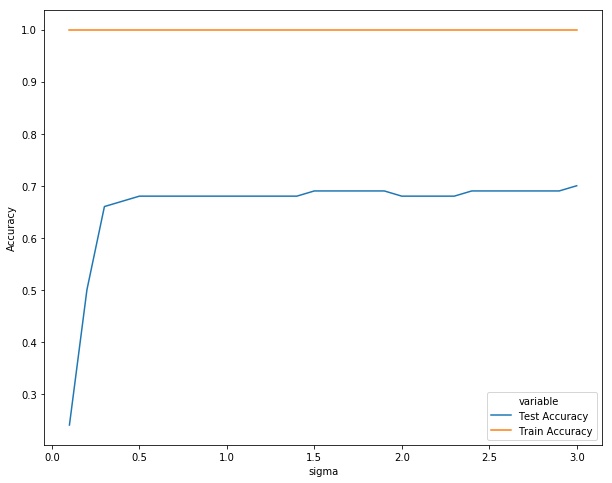

In [47]:
#Plotting Train\Test Accuracy vs Sigma for D1 Dataset
seasns.lineplot(x='sigma',y='value',hue='variable',data=parzenAccuracyD1.melt(id_vars=['sigma'],value_vars=['Test Accuracy','Train Accuracy']))
plt.ylabel('Accuracy')
plt.show()

In [46]:
parzenAccuracyD1.head(5)

,sigma,Train Accuracy,Test Accuracy
0,0.1,1.0,0.24
1,0.2,1.0,0.50
2,0.3,1.0,0.66
3,0.4,1.0,0.67
4,0.5,1.0,0.68


In [32]:
parzenAccuracyD2.head(5)

,sigma,Train Accuracy,Test Accuracy
0,0.1,1.0,0.73
1,0.2,1.0,0.77
2,0.3,1.0,0.77
3,0.4,1.0,0.78
4,0.5,1.0,0.77


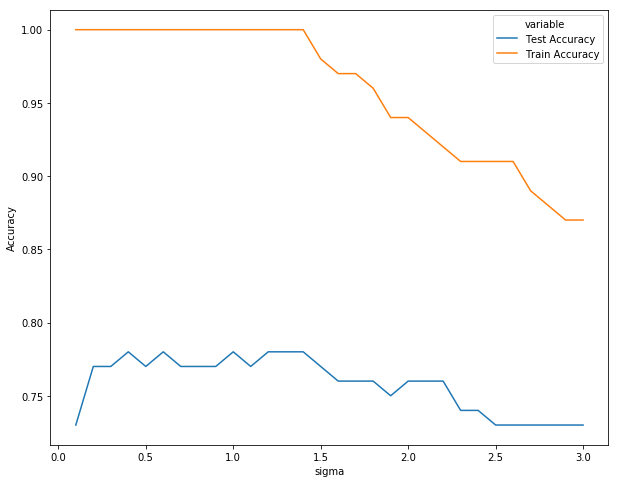

In [33]:
#Plotting Train and Test Accuracy vs Sigma for D2 Dataset
seasns.lineplot(x='sigma',y='value',hue='variable',data=parzenAccuracyD2.melt(id_vars=['sigma'],value_vars=['Test Accuracy','Train Accuracy']))
plt.ylabel('Accuracy')
plt.show()

In [63]:
dataset1KNN.loc[dataset1KNN['k-value'] == 7]

,k,Type of Data,Accuracy
6,7,training,0.9139
7,7,test,0.8857


In [64]:
dataset2KNN.loc[dataset2KNN['k-value'] == 7]

,k,Type of Data,Accuracy
6,7,training,0.9356
7,7,test,0.8530


In [65]:
parzenAccuracyD1.loc[parzenAccuracy['sigma'] == 1.0]['Test Accuracy']

9    0.67
Name: Test Accuracy, dtype: float64

In [66]:
parzenAccuracyD2.loc[parzenAccuracyD2['sigma'] == 1.0]['Test Accuracy']

9    0.78
Name: Test Accuracy, dtype: float64

-> The Optimal sigma value for the D1 is around 0.3 and for D2 is around 1.2

-> The Optimal k value for the dataset with respective to the test accuracies is around 3

-> Among the classifier we can see that KNN is more accuracte than the parzen window
   for KNN the accuracy for D1 and D2 test dataset are around 88% and 85% respectively, where as for the parzen window for D1      and D2 are around 67% and 78%, as mentioned above output

# P6 : News group Text Classifier

In [8]:
import os,re
import pandas as panda
import numpy as numpy
import nltk,unicodedata
import operator,math
import inflect

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
directoryPath = 'D:/20news-19997/20_newsgroups'

In [10]:
content,listOfFile = [],[]
for rootPath, directory, files in os.walk(directoryPath):
    for file in files:
        content.append(re.sub(r'D:/20news-19997/20_newsgroups/','',rootPath))
        listOfFile.append(os.path.join(rootPath,file))

In [ ]:

dfFile = panda.DataFrame({'filename':listOfFile, 'label' : content})
list(dfFile['label'].unique())

In [12]:
trainData = panda.DataFrame(columns=['filename','label'])
testData = panda.DataFrame(columns=['filename','label'])

for label in list(dfFile['label'].unique()):
    threshold = dfFile.loc[dfFile['label'] == label].shape[0] * 0.7
    threshold = int(numpy.floor(threshold))
    trainData = trainData.append(dfFile.loc[dfFile['label'] == label].iloc[:threshold,:],ignore_index=True)
    testData = testData.append(dfFile.loc[dfFile['label'] == label].iloc[threshold:,:],ignore_index=True)

print(trainData.shape[0],testData.shape[0])

13997 6000


In [13]:
def convertToLowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def nonAsciiWordRemoval(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def numberReplace(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            pass
            #new_word = p.number_to_words(word)
            #new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def punctuationRemoval(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def numberReplace(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            pass
            #new_word = p.number_to_words(word)
            #new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stopwordRemoval(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = nonAsciiWordRemoval(words)
    words = convertToLowercase(words)
    words = punctuationRemoval(words)
    words = numberReplace(words)
    words = stopwordRemoval(words)
    return words

In [14]:
# Dictionary to hold vectorizer objects
vect_dict = {}
# Dictionary to hold Document term matrix for each class.
# The document term matrix is converted to a Pandas DataFrame
class_dict = {}
for label in list(trainData['label'].unique()):
    # List to hold words for each label
    class_words_preprocessed = []
    for filename in trainData.loc[trainData['label'] == label]['filename']:
        with open(filename,'r',errors='ignore') as filein:
            data = filein.read()
        words = re.split('\W+',data)
        words = normalize(words)
        class_words_preprocessed.append(' '.join(words))
    vect_dict[label] = CountVectorizer(input='content',analyzer='word',decode_error='ignore')
    class_dict[label] = panda.DataFrame(vect_dict[label].fit_transform(class_words_preprocessed).todense().T)
    class_dict[label]['count_docs'] = class_dict[label].sum(axis=1)
    class_dict[label]['word'] = vect_dict[label].get_feature_names()
    class_dict[label] = class_dict[label].sort_values(by='count_docs',ascending=False).iloc[:5000,:]
    tot_freq = class_dict[label]['count_docs'].sum()
    class_dict[label]['p(w|c)'] =  (class_dict[label]['count_docs'] + 30) / (tot_freq + (5000 * 30))

In [16]:
top25_list = []
for label in list(trainData['label'].unique()):
    top25_list.append(class_dict[label].iloc[:25,:]['word'])
intersect = set(top25_list[0])
for list_ in top25_list[1:]:
    intersect.intersection_update(list_)
print(intersect)

{'srv', 'cs', 'cmu', 'edu', 'message', 'com', 'subject'}


In [17]:
for label in list(trainData['label'].unique()):
    class_dict[label] = class_dict[label].loc[~ class_dict[label]['word'].isin(list(intersect))]
for label in list(trainData['label'].unique()):
    tot_freq = class_dict[label]['count_docs'].sum()
    class_dict[label]['p(w|c)'] =  (class_dict[label]['count_docs'] + 30) / (tot_freq + (5000 * 30))

In [18]:
# Final Word Dictionary for each class
for label in list(trainData['label'].unique()):
    class_dict[label] = panda.Series(class_dict[label]['p(w|c)'].values,index=class_dict[label]['word']).to_dict()

In [19]:
class_priors_dict = {}
total_freq = 0
for label in list(dfFile['label'].unique()):
    class_priors_dict[label] = dfFile.loc[dfFile['label'] == label].shape[0]
    total_freq += class_priors_dict[label]
for label in list(dfFile['label'].unique()):
    class_priors_dict[label] = numpy.round(class_priors_dict[label] / total_freq, 4)

In [ ]:
class_priors_dict

In [21]:
train_predicted = panda.DataFrame(columns=['predicted','max_class_posterior_prob'])
for train_doc in list(trainData['filename']):
    with open(train_doc,'r',errors='ignore') as filein:
            data = filein.read()
    words = re.split('\W+',data)
    words = normalize(words)
    log_posterior_dict = class_priors_dict
    log_posterior_dict = dict([(k,math.log(v)) for (k,v) in log_posterior_dict.items()])
    for word in words:
        for k,v in log_posterior_dict.items():
            try:
                log_posterior_dict[k] = log_posterior_dict[k] + math.log(class_dict[k][word])
            except:
                pass
    log_posterior_dict = dict([(k,numpy.exp(v)) for (k,v) in log_posterior_dict.items()])
    train_predicted = train_predicted.append({'predicted':max(log_posterior_dict, key=log_posterior_dict.get),'max_class_posterior_prob':max(log_posterior_dict.values())},ignore_index=True)
train_predicted['actual'] = trainData['label']   
print('Training Accuracy : {}'.format(numpy.round(train_predicted.loc[train_predicted['predicted'] == train_predicted['actual']].shape[0]/train_predicted.shape[0],4)))

Training Accuracy : 0.0259


In [23]:
test_predicted = panda.DataFrame(columns=['predicted','max_class_posterior_prob'])
for test_doc in list(testData['filename']):
    with open(test_doc,'r',errors='ignore') as filein:
            data = filein.read()
    words = re.split('\W+',data)
    words = normalize(words)
    log_posterior_dict = class_priors_dict
    log_posterior_dict = dict([(k,math.log(v)) for (k,v) in log_posterior_dict.items()])
    for word in words:
        for k,v in log_posterior_dict.items():
            try:
                log_posterior_dict[k] = log_posterior_dict[k] + math.log(class_dict[k][word])
            except:
                pass
    log_posterior_dict = dict([(k,numpy.exp(v)) for (k,v) in log_posterior_dict.items()])
    test_predicted = test_predicted.append({'predicted':max(log_posterior_dict, key=log_posterior_dict.get),'max_class_posterior_prob':max(log_posterior_dict.values())},ignore_index=True)
test_predicted['actual'] = testData['label']   
print('Testing Accuracy : {}'.format(numpy.round(test_predicted.loc[test_predicted['predicted'] == test_predicted['actual']].shape[0]/test_predicted.shape[0],4)))

Testing Accuracy : 0.027


In [24]:
# Dictionary to hold vectorizer objects
vect_dict = {}
# Dictionary to hold Document term matrix for each class.
# The document term matrix is converted to a Pandas DataFrame
class_dict = {}
for label in list(trainData['label'].unique()):
    # List to hold words for each label
    class_words_preprocessed = []
    for filename in trainData.loc[trainData['label'] == label]['filename']:
        with open(filename,'r',errors='ignore') as filein:
            data = filein.read()
        words = re.split('\W+',data)
        words = normalize(words)
        class_words_preprocessed.append(' '.join(words))
    vect_dict[label] = CountVectorizer(input='content',analyzer='word',decode_error='ignore')
    class_dict[label] = panda.DataFrame(vect_dict[label].fit_transform(class_words_preprocessed).todense().T)
    class_dict[label]['count_docs'] = class_dict[label].sum(axis=1)
    class_dict[label]['word'] = vect_dict[label].get_feature_names()
    class_dict[label] = class_dict[label].sort_values(by='count_docs',ascending=False).iloc[:10000,:]
    tot_freq = class_dict[label]['count_docs'].sum()
    class_dict[label]['p(w|c)'] =  (class_dict[label]['count_docs'] + 30) / (tot_freq + (10000 * 30))

In [25]:
top25_list = []
for label in list(trainData['label'].unique()):
    top25_list.append(class_dict[label].iloc[:25,:]['word'])
intersect = set(top25_list[0])
for list_ in top25_list[1:]:
    intersect.intersection_update(list_)
print(intersect)

{'srv', 'cs', 'cmu', 'edu', 'message', 'com', 'subject'}


In [26]:
#Removing these words from each dictionary and recalculating probabilities
#
#
for label in list(trainData['label'].unique()):
    class_dict[label] = class_dict[label].loc[~ class_dict[label]['word'].isin(list(intersect))]
for label in list(trainData['label'].unique()):
    tot_freq = class_dict[label]['count_docs'].sum()
    class_dict[label]['p(w|c)'] =  (class_dict[label]['count_docs'] + 30) / (tot_freq + (5000 * 30))

In [27]:
# Final Word Dictionary for each class
for label in list(trainData['label'].unique()):
    class_dict[label] = panda.Series(class_dict[label]['p(w|c)'].values,index=class_dict[label]['word']).to_dict()

In [28]:
#Calculating Training Accuracy¶

train_predicted = panda.DataFrame(columns=['predicted','max_class_posterior_prob'])
for train_doc in list(trainData['filename']):
    with open(train_doc,'r',errors='ignore') as filein:
            data = filein.read()
    words = re.split('\W+',data)
    words = normalize(words)
    log_posterior_dict = class_priors_dict
    log_posterior_dict = dict([(k,math.log(v)) for (k,v) in log_posterior_dict.items()])
    for word in words:
        for k,v in log_posterior_dict.items():
            try:
                log_posterior_dict[k] = log_posterior_dict[k] + math.log(class_dict[k][word])
            except:
                pass
    log_posterior_dict = dict([(k,numpy.exp(v)) for (k,v) in log_posterior_dict.items()])
    train_predicted = train_predicted.append({'predicted':max(log_posterior_dict, key=log_posterior_dict.get),'max_class_posterior_prob':max(log_posterior_dict.values())},ignore_index=True)
train_predicted['actual'] = trainData['label']   
print('Training Accuracy : {}'.format(numpy.round(train_predicted.loc[train_predicted['predicted'] == train_predicted['actual']].shape[0]/train_predicted.shape[0],4)))

Training Accuracy : 0.0319


In [30]:
#Calculating Test Accuracy¶

test_predicted = panda.DataFrame(columns=['predicted','max_class_posterior_prob'])
for test_doc in list(testData['filename']):
    with open(test_doc,'r',errors='ignore') as filein:
            data = filein.read()
    words = re.split('\W+',data)
    words = normalize(words)
    log_posterior_dict = class_priors_dict
    log_posterior_dict = dict([(k,math.log(v)) for (k,v) in log_posterior_dict.items()])
    for word in words:
        for k,v in log_posterior_dict.items():
            try:
                log_posterior_dict[k] = log_posterior_dict[k] + math.log(class_dict[k][word])
            except:
                pass
    log_posterior_dict = dict([(k,numpy.exp(v)) for (k,v) in log_posterior_dict.items()])
    test_predicted = test_predicted.append({'predicted':max(log_posterior_dict, key=log_posterior_dict.get),'max_class_posterior_prob':max(log_posterior_dict.values())},ignore_index=True)
test_predicted['actual'] = testData['label']   
print('Testing Accuracy : {}'.format(numpy.round(test_predicted.loc[test_predicted['predicted'] == test_predicted['actual']].shape[0]/test_predicted.shape[0],4)))

Testing Accuracy : 0.0325


    # P7 Pair wise Classifier Features

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [32]:
DATA_DIR ='D:/MNIST/'

In [33]:

train = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
test = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
for num in range(10):
    # Consolidating training data
    temp_train = pd.read_csv(os.path.join(DATA_DIR,'train{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_train['label'] = num
    train = train.append(temp_train,ignore_index=True)
    # Consolidating test data
    temp_test = pd.read_csv(os.path.join(DATA_DIR,'test{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_test['label'] = num
    test = test.append(temp_test,ignore_index=True)

In [34]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
train = train.dropna()
test = test.dropna()

In [36]:
train.isnull().values.any()

False

In [37]:
test.isnull().values.any()

False

In [42]:
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [43]:
classPairFischer = pd.DataFrame(columns=['class_pair'] + ['d{}'.format(i) for i in range(1,785)])
for classNo,nestedClassNo in itertools.combinations(range(10), 2):
    train_temp = train.loc[train['label'].isin([classNo,nestedClassNo])]
    X_train = train_temp.iloc[:,:784]
    Y_train = train_temp.iloc[:,784]
    fisher = LinearDiscriminantAnalysis(n_components=9).fit(X_train,Y_train.astype('int'))
    df_temp = pd.DataFrame(fisher.coef_,columns=['d{}'.format(i) for i in range(1,785)])
    df_temp['class_pair'] = '{0}{1}'.format(classNo,nestedClassNo)
    classPairFischer = pd.concat([classPairFischer,df_temp],sort=False,ignore_index=True)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\w

In [44]:
classPairFischer.set_index('class_pair',inplace=True)

In [45]:
def scale_255(row):
    old_sum = row.sum()
    if old_sum != 0:
        row = (row / old_sum) * 255
    return row

classPairFischer = classPairFischer.apply(lambda row: scale_255(row),axis=1)

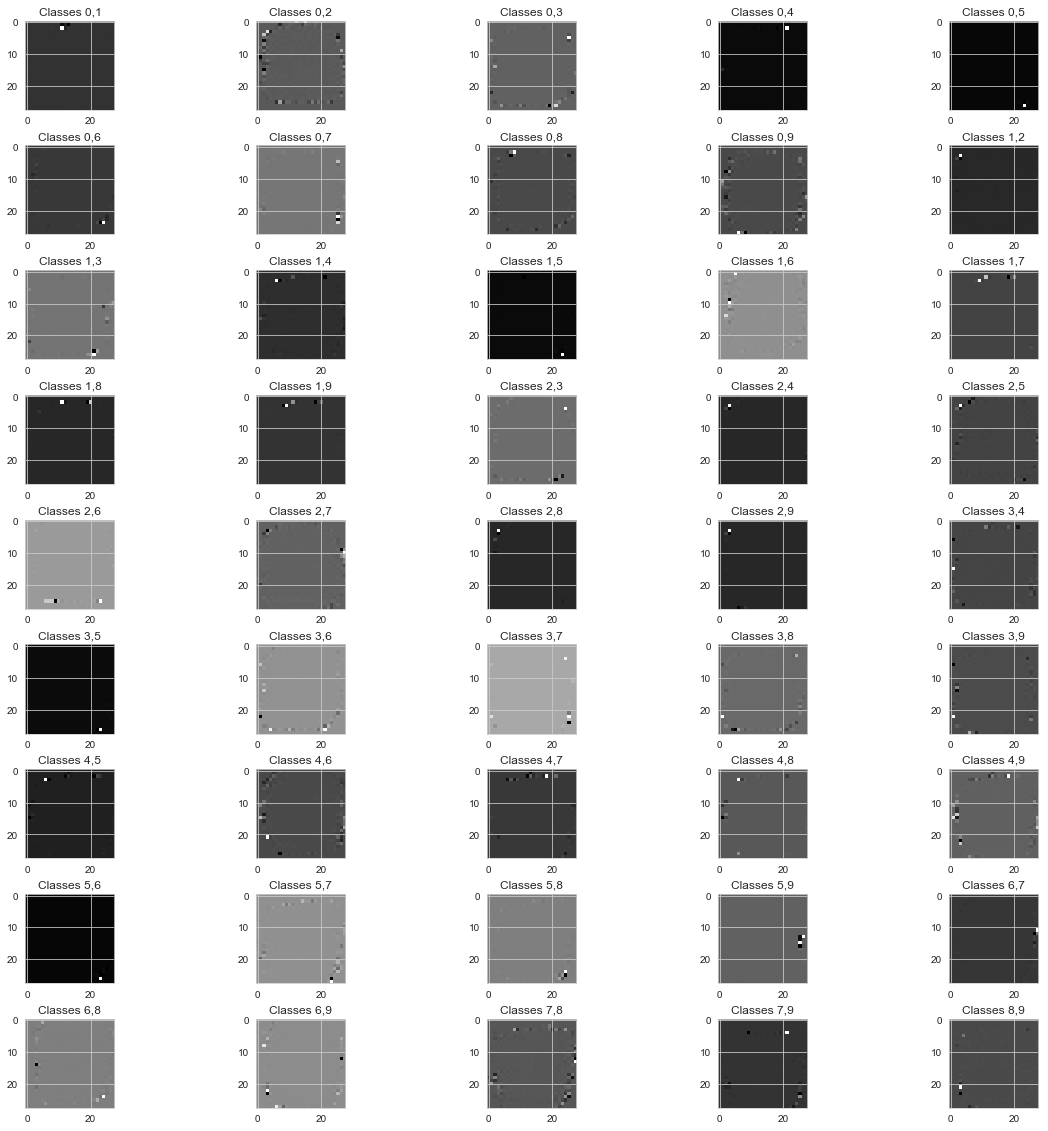

In [46]:
f,axarr = plt.subplots(9,5,figsize=[20,20])
rowIndex = 0
for x,y in itertools.product(range(9),range(5)):
    axarr[x,y].imshow(classPairFischer.iloc[rowIndex,:].values.reshape((28,28)),cmap='gray')
    axarr[x,y].set_title('Classes {0},{1}'.format(list(classPairFischer.index[rowIndex])[0],list(classPairFischer.index[rowIndex])[1]))
    rowIndex += 1
f.subplots_adjust(hspace=0.4)
plt.show()

    P8 Binary Hierarchical Classifier

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC



from IPython.display import Image
#sns.set_style('whitegrid')

In [2]:
import anytree
from anytree import Node, RenderTree
from anytree.exporter import DotExporter

In [ ]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/welcome/Downloads/graphviz-2.38/release/bin/'

In [88]:

DATA_DIR ='D:/MNIST/'
WORK_DIR = 'D:/MNIST'

In [4]:
train = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
test = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
for num in range(10):
    # Consolidating training data
    temp_train = pd.read_csv(os.path.join(DATA_DIR,'train{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_train['label'] = num
    train = train.append(temp_train,ignore_index=True)
    # Consolidating test data
    temp_test = pd.read_csv(os.path.join(DATA_DIR,'test{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_test['label'] = num
    test = test.append(temp_test,ignore_index=True)

In [5]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train = train.dropna()
test = test.dropna()

In [7]:
train.isnull().values.any()

False

In [8]:

test.isnull().values.any()

False

In [9]:
train_test_acc = pd.DataFrame(columns=['node','training_acc','test_acc'])

In [10]:
root = Node("root")
node_dict = {'0' : Node("Class_0",parent=root),
             '1' : Node("Class_1",parent=root),
             '2' : Node("Class_2",parent=root),
             '3' : Node("Class_3",parent=root),
             '4' : Node("Class_4",parent=root),
             '5' : Node("Class_5",parent=root),
             '6' : Node("Class_6",parent=root),
             '7' : Node("Class_7",parent=root),
             '8' : Node("Class_8",parent=root),
             '9' : Node("Class_9",parent=root)                
            }

In [11]:
warnings.filterwarnings('ignore')

In [12]:

train_svm = train
train_svm['label'] = train_svm['label'].astype('str')

test_svm = test
test_svm['label'] = test_svm['label'].astype('str')

classes = [str(num) for num in range(10)]
# svm_classes = {}
# train_scores = {}

while len(classes) > 2:
    svm_classes = {}
    train_scores = {}
    test_scores = {}
    for classNo,nestedClassNo in itertools.combinations(classes, 2):
        # Building training and test data for pair of classes
        train_temp = train_svm.loc[train_svm['label'].isin([classNo,nestedClassNo])]
        X_train = train_temp.iloc[:,:784]
        Y_train = train_temp.iloc[:,784]
        test_temp = test_svm.loc[test_svm['label'].isin([classNo,nestedClassNo])]
        X_test = test_temp.iloc[:,:784]
        Y_test = test_temp.iloc[:,784]
        # Fitting SVM classifier on pair of classes
        svm_classes['{0}_{1}'.format(classNo,nestedClassNo)] = LinearSVC(random_state=0)
        svm_classes['{0}_{1}'.format(classNo,nestedClassNo)].fit(X_train,Y_train.astype('int'))
        # Calculating scores on training and test data
        train_scores['{0}_{1}'.format(classNo,nestedClassNo)] = svm_classes['{0}_{1}'.format(classNo,nestedClassNo)].score(X_train,Y_train.astype('int'))
        test_scores['{0}_{1}'.format(classNo,nestedClassNo)] = svm_classes['{0}_{1}'.format(classNo,nestedClassNo)].score(X_test,Y_test.astype('int'))
        
    # Finding class pair with least training accuracy
    min_class_pair = min(train_scores,key=train_scores.get)
    
    # Appending training and test accuracies to dataframe
    train_test_acc = train_test_acc.append({'node' : min_class_pair, 
                                            'training_acc' : train_scores[min_class_pair], 
                                            'test_acc' : test_scores[min_class_pair]},
                                           ignore_index=True)
    
    # Updating classes list
    classes = [val for val in classes if val not in min_class_pair.split('_')]
    classes.append(''.join(min_class_pair.split('_')))
    
    # Updating Nodes
    node_dict[''.join(min_class_pair.split('_'))] = Node('Class_{0}'.format(min_class_pair),parent=root)
    for key in min_class_pair.split('_'):
        node_dict[key].parent = node_dict[''.join(min_class_pair.split('_'))]
        
    # Relabeling train_svm
    train_svm.loc[train_svm['label'].isin(min_class_pair.split('_')),'label'] = ''.join(min_class_pair.split('_'))
    
    # Relabeling test_svm
    test_svm.loc[test_svm['label'].isin(min_class_pair.split('_')),'label'] = ''.join(min_class_pair.split('_'))
    
    print(classes)

['0', '1', '2', '3', '4', '6', '7', '9', '58']
['0', '1', '2', '4', '6', '7', '9', '358']
['0', '1', '4', '6', '7', '9', '2358']
['0', '1', '4', '6', '2358', '79']
['0', '1', '4', '6', '235879']
['0', '1', '4', '6235879']
['0', '1', '46235879']
['0', '146235879']


In [94]:
WORK_DIR = 'C:/Users/welcome/AppData/Roaming/jupyter/kernels/python3'

In [89]:
for line in DotExporter(root):
    print(line)

digraph tree {
    "root";
    "Class_0";
    "Class_1_46235879";
    "Class_1";
    "Class_4_6235879";
    "Class_4";
    "Class_6_235879";
    "Class_6";
    "Class_2358_79";
    "Class_2";
    "Class_3_58";
    "Class_3";
    "Class_5_8";
    "Class_5";
    "Class_8";
    "Class_7_9";
    "Class_7";
    "Class_9";
    "root" -> "Class_0";
    "root" -> "Class_1_46235879";
    "Class_1_46235879" -> "Class_1";
    "Class_1_46235879" -> "Class_4_6235879";
    "Class_4_6235879" -> "Class_4";
    "Class_4_6235879" -> "Class_6_235879";
    "Class_6_235879" -> "Class_6";
    "Class_6_235879" -> "Class_2358_79";
    "Class_2358_79" -> "Class_2";
    "Class_2358_79" -> "Class_3_58";
    "Class_2358_79" -> "Class_7_9";
    "Class_3_58" -> "Class_3";
    "Class_3_58" -> "Class_5_8";
    "Class_5_8" -> "Class_5";
    "Class_5_8" -> "Class_8";
    "Class_7_9" -> "Class_7";
    "Class_7_9" -> "Class_9";
}


In [90]:
from anytree import Node
root = Node("root")
Class_0 = Node("Class_0", parent=root)
Class_1_46235879 = Node("Class_1_46235879", parent=root)
Class_1 = Node("Class_1", parent= Class_1_46235879)
Class_4_6235879 = Node("Class_4_6235879", parent= Class_1_46235879)
Class_4 = Node("Class_4", parent= Class_4_6235879)
Class_6_235879 = Node("Class_6_235879", parent= Class_4_6235879)
Class_6 = Node("Class_6", parent= Class_6_235879)
Class_2358_79 = Node("Class_2358_79", parent= Class_6_235879)
Class_2 = Node("Class_2", parent= Class_2358_79)
Class_3_58 = Node("Class_3_58", parent= Class_2358_79)
Class_3 = Node("Class_3", parent= Class_3_58)
Class_5_8 = Node("Class_5_8", parent= Class_3_58)
Class_5 = Node("Class_5", parent= Class_5_8)
Class_8= Node("Class_8", parent= Class_5_8)
Class_7_9= Node("Class_7_9", parent= Class_2358_79)
Class_7= Node("Class_7", parent= Class_7_9)
Class_9= Node("Class_9", parent= Class_7_9)


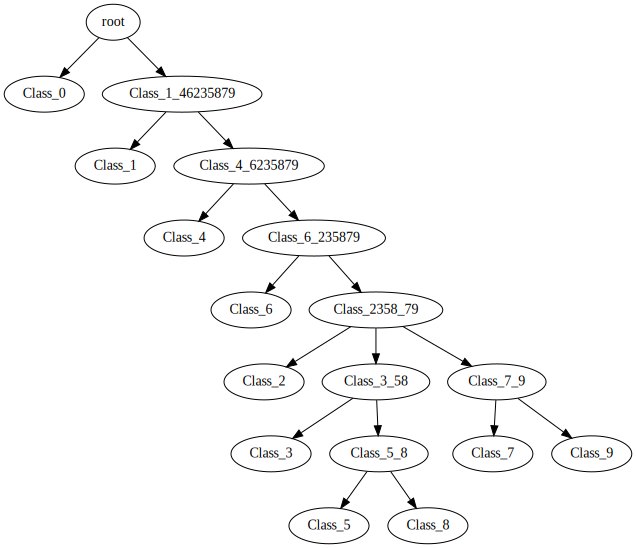

In [91]:
DotExporter(root).to_dotfile('treeStructure.dot')
from graphviz import Source
Source.from_file('treeStructure.dot')

In [92]:
from graphviz import render
render('dot', 'png', 'treeStructure.dot') 

'treeStructure.dot.png'

In [96]:
print(train_test_acc)

         node  training_acc  test_acc
0         5_8      0.945610  0.916334
1        3_58      0.951602  0.930340
2       2_358      0.961604  0.947120
3         7_9      0.970031  0.935974
4     2358_79      0.968895  0.957805
5    6_235879      0.967720  0.960556
6   4_6235879      0.925764  0.923802
7  1_46235879      0.975791  0.971301
